# Seaborn

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
mpl.rc( "figure", figsize=(15,10) )

## Basics, styles and themes

Seaborn works on top of Matplotlib, improving aesthetics automatically. Let's define a sinplot() function that draws a sinusoidal wave:

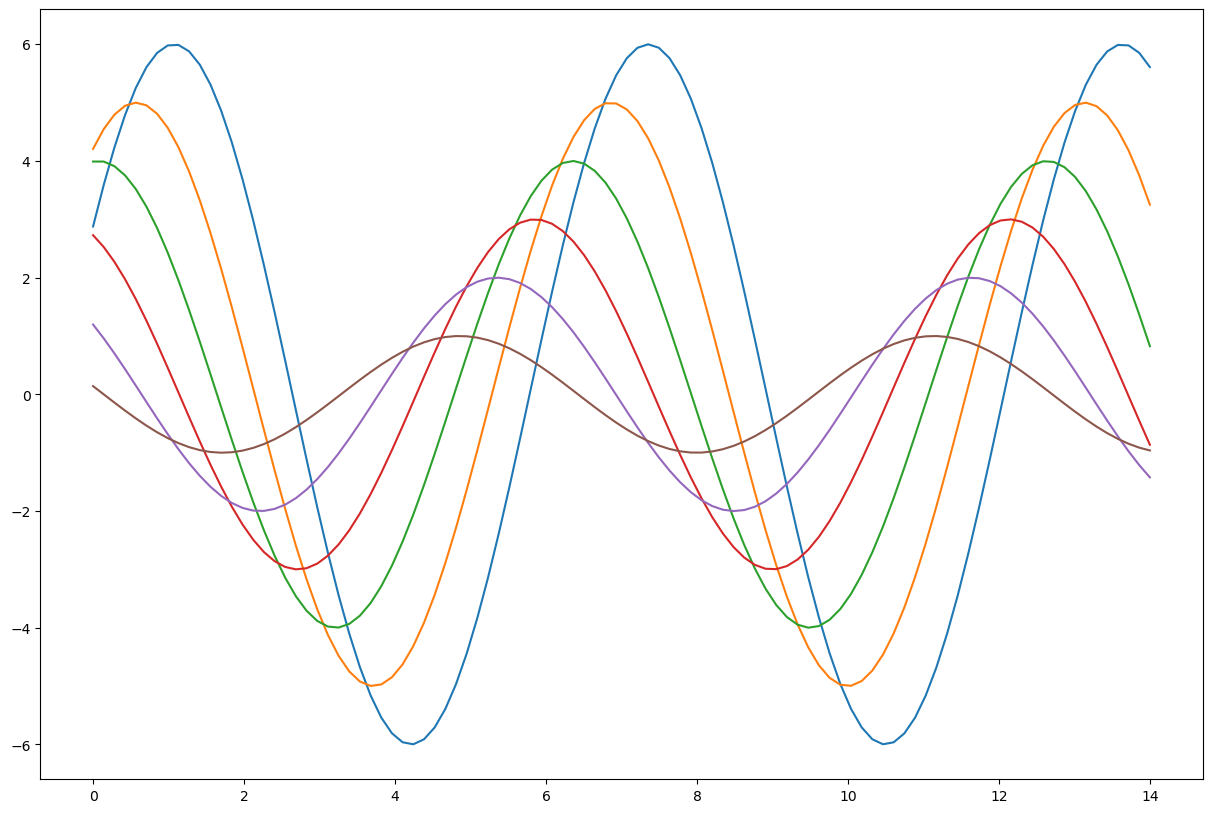

In [2]:
np.random.seed(sum(map(ord, "aesthetics")))
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sinplot()

To use Seaborn, we just import it:

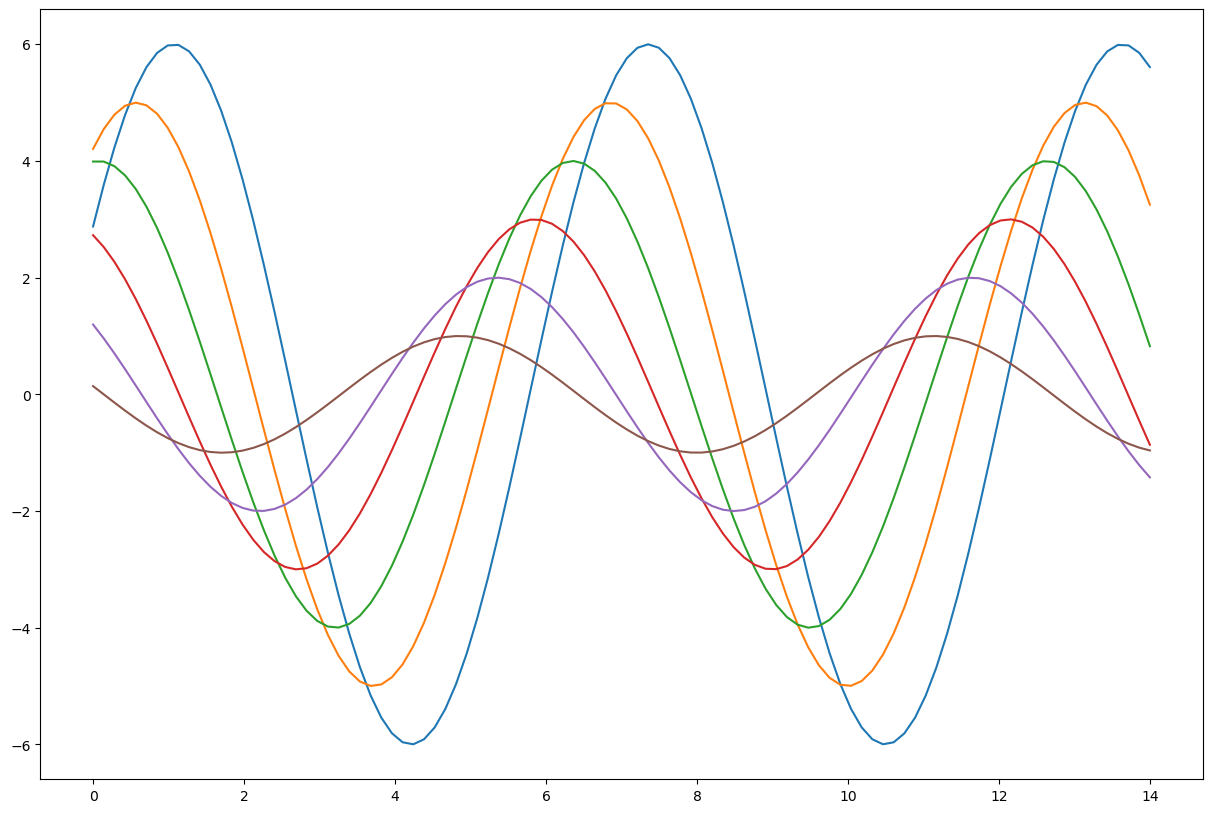

In [3]:
import seaborn as sns
sinplot()

By default there is not much difference between basic Matplotlib and Seaborn. However, Seaborn provides predefined themes: $darkgrid$, $whitegrid$, $white$ (used by default in Python 3), and $ticks$:

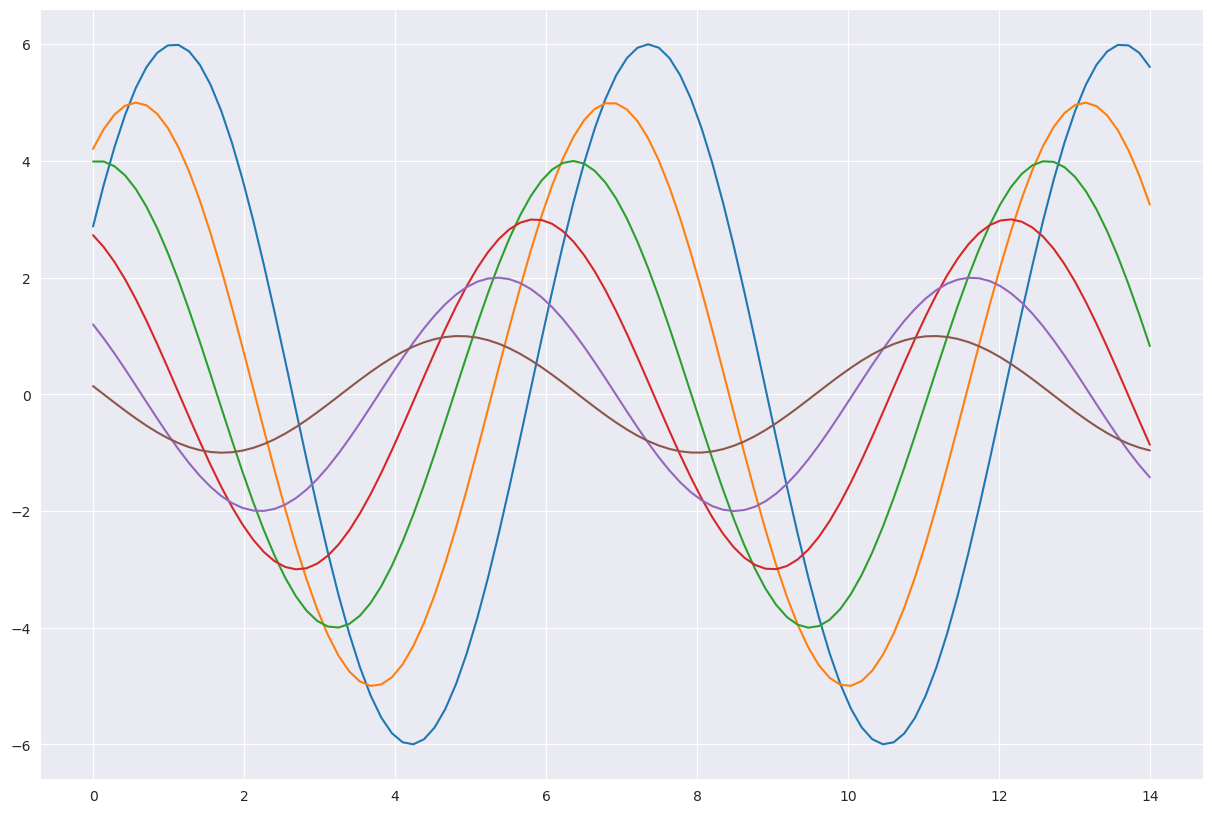

In [4]:
sns.set_style( "darkgrid" )
sinplot()

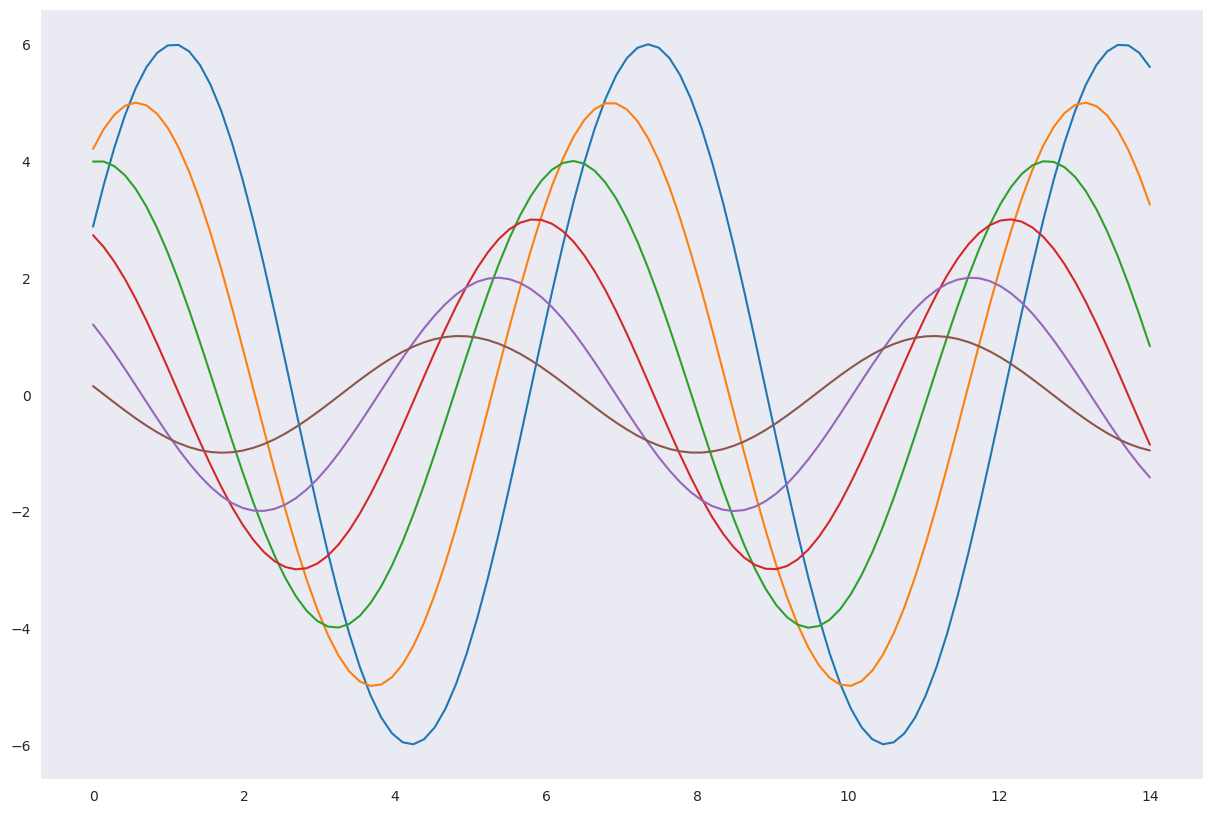

In [5]:
sns.set_style( "dark" )
sinplot()

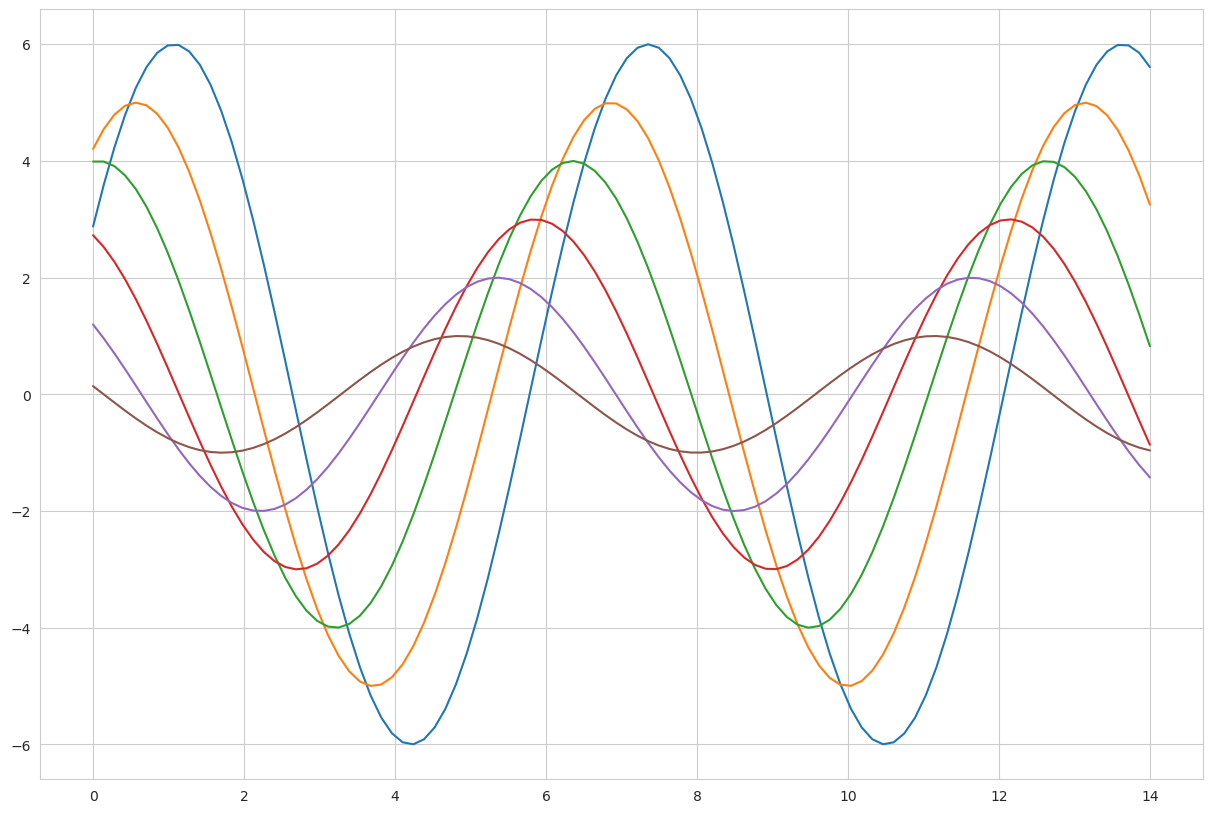

In [6]:
sns.set_style( "whitegrid" )
sinplot()

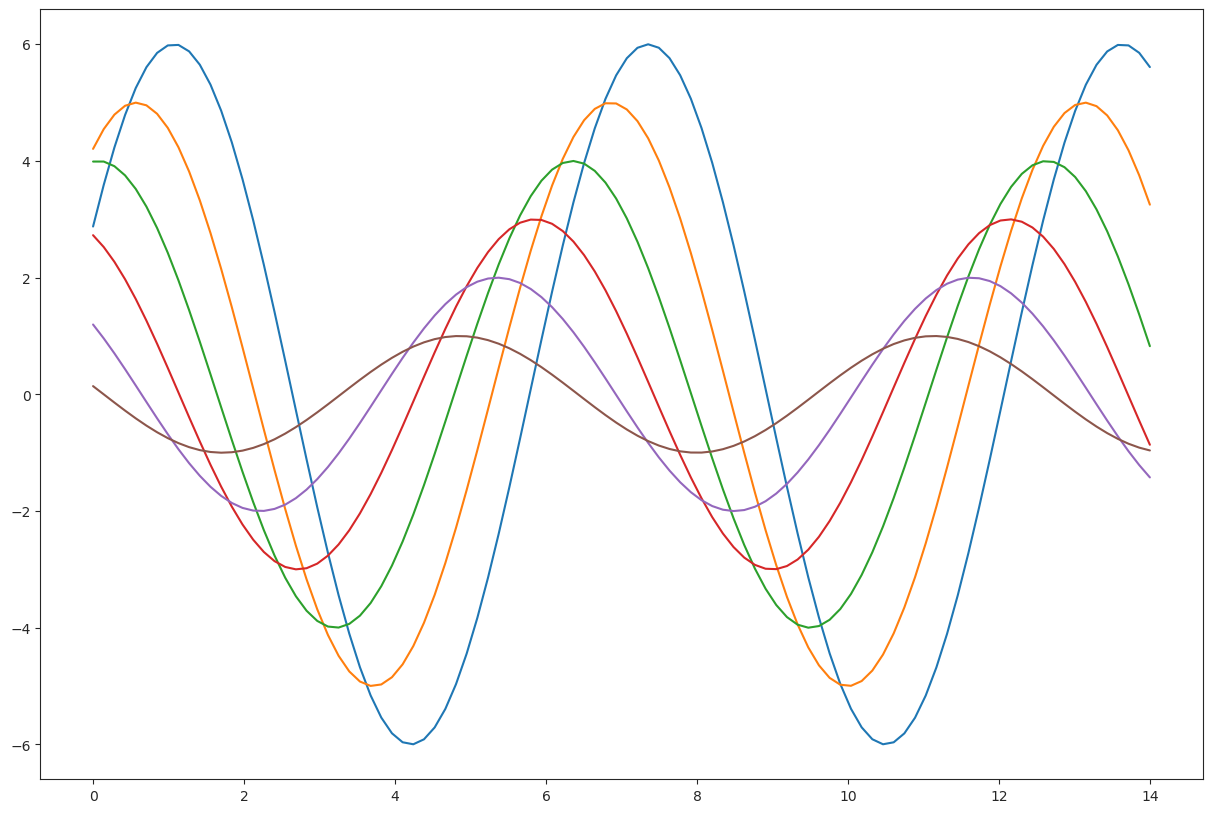

In [7]:
sns.set_style( "ticks" )
sinplot()

We can remove the top and right spines:

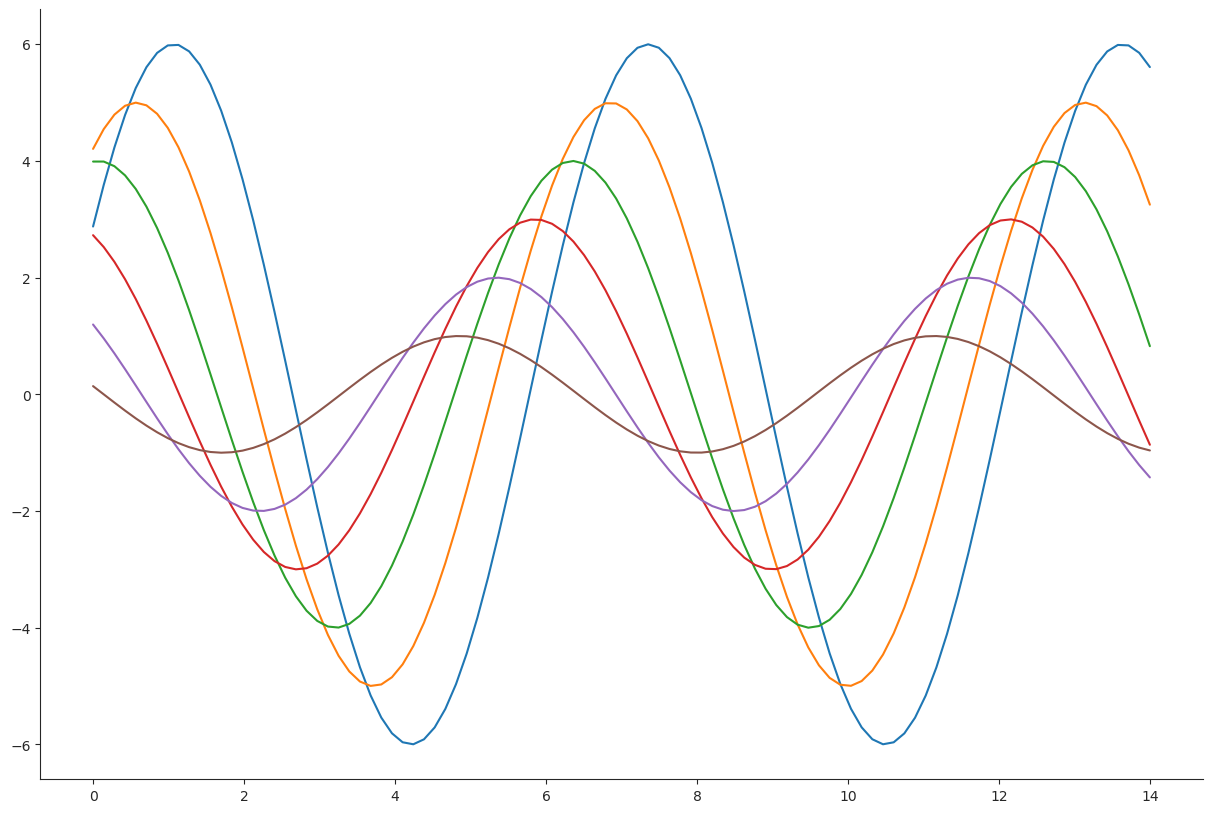

In [8]:
sinplot()
sns.despine()

And shift the axes:

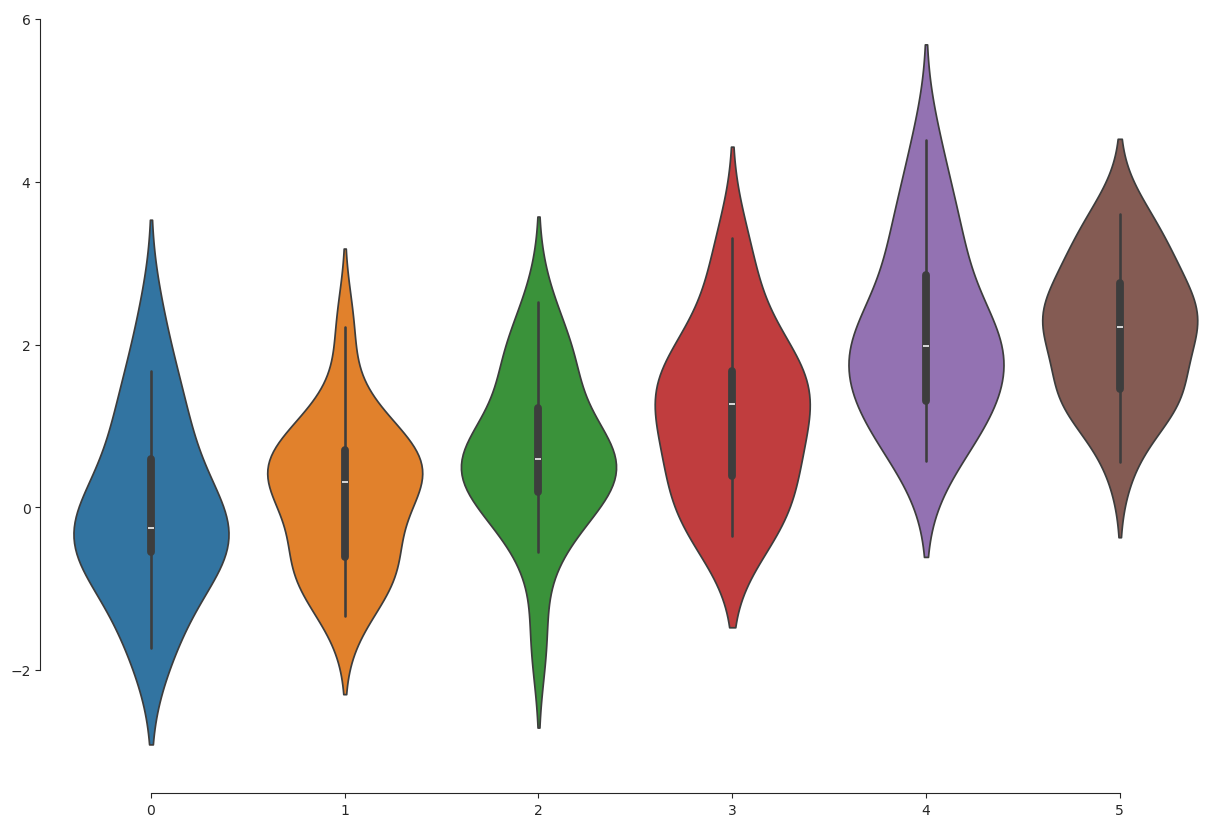

In [9]:
f, ax = plt.subplots()
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.violinplot( data=data )
sns.despine( offset=10, trim=True );

Besides colors, Seaborn allows to conveniently change font and line sizes to adapt plots to their future uses, with the predfined setups $paper$, $notebook$ (by default), $talk$, and $poster$:

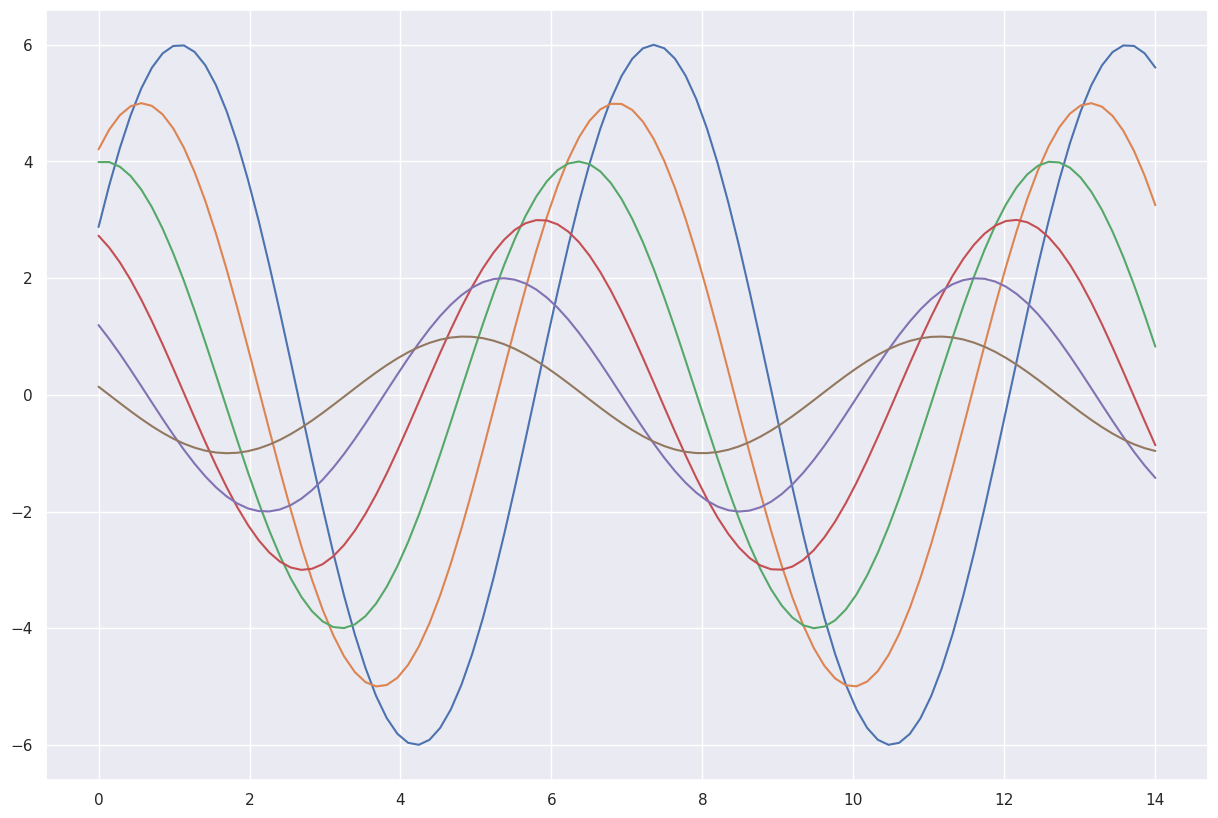

In [10]:
sns.set() # Resets default configuration
sinplot()

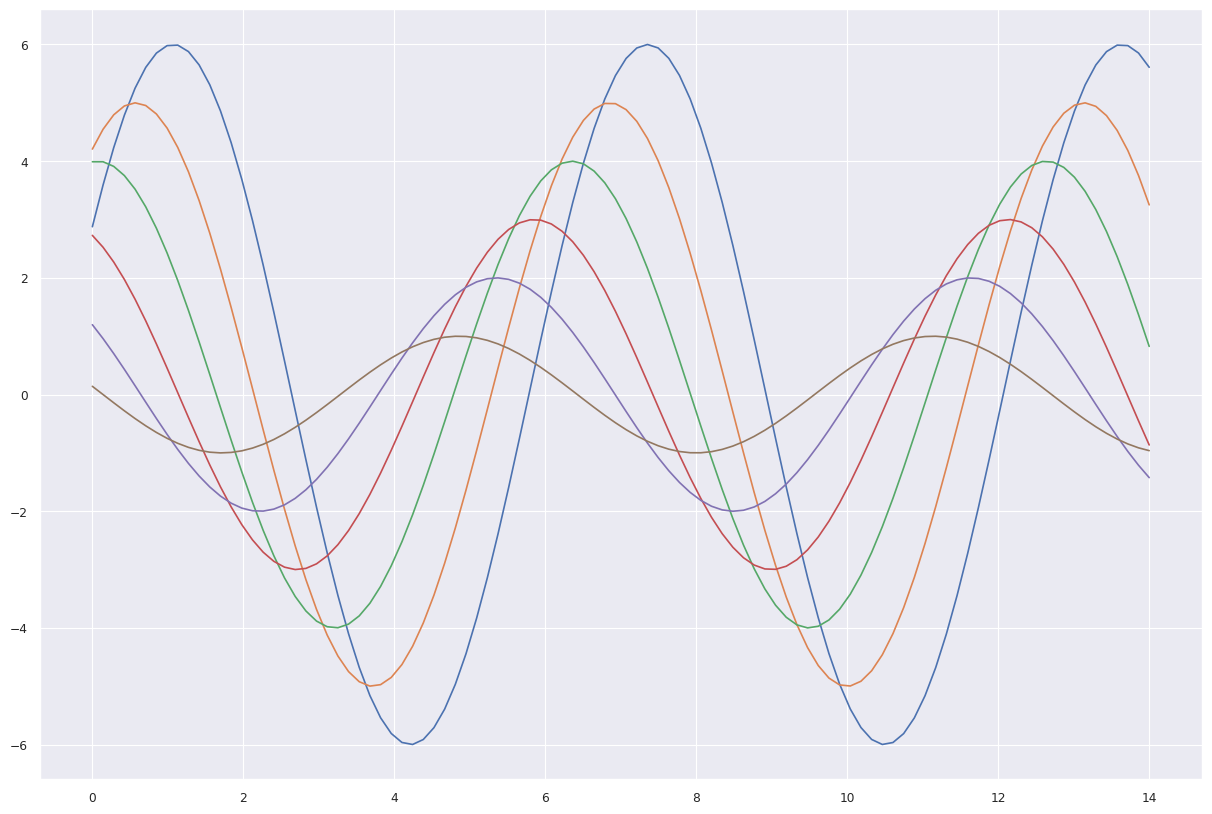

In [11]:
sns.set_context( "paper" )
sinplot()

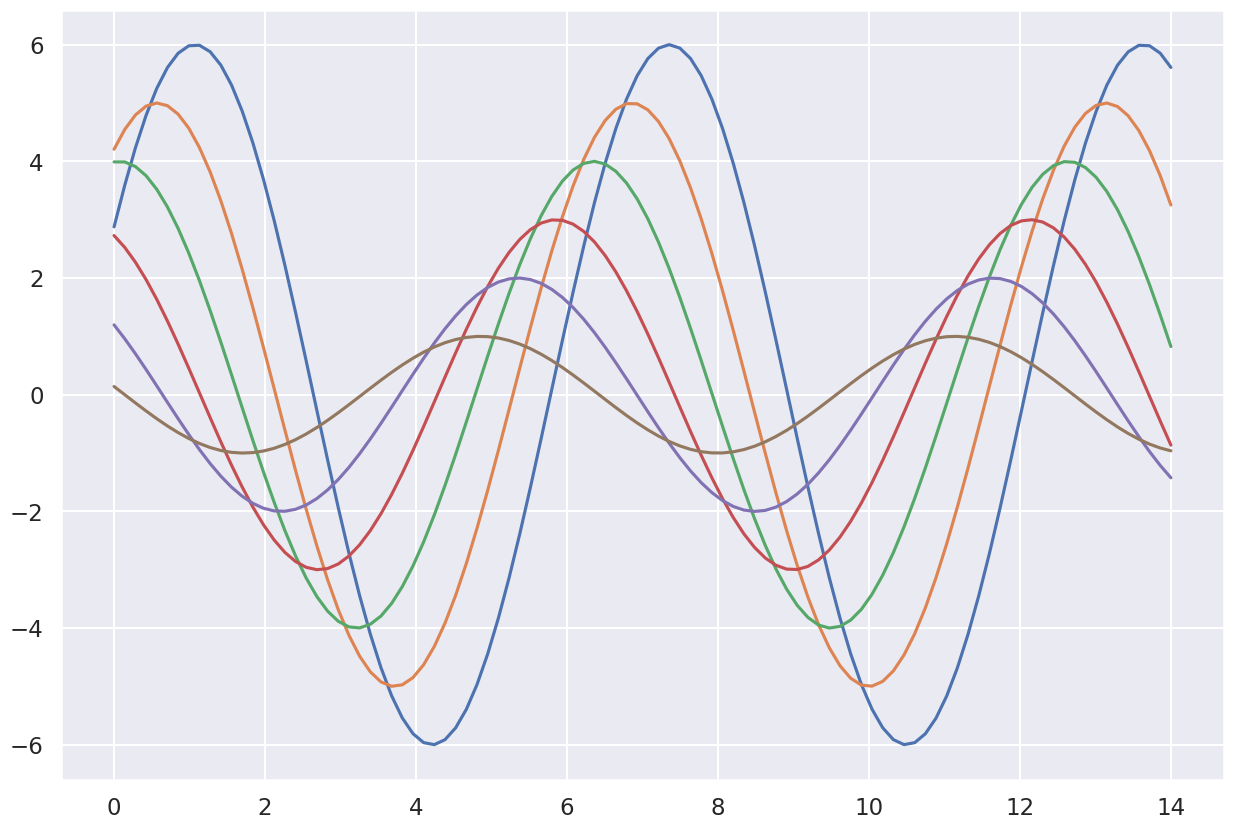

In [12]:
sns.set_context( "talk" )
sinplot()

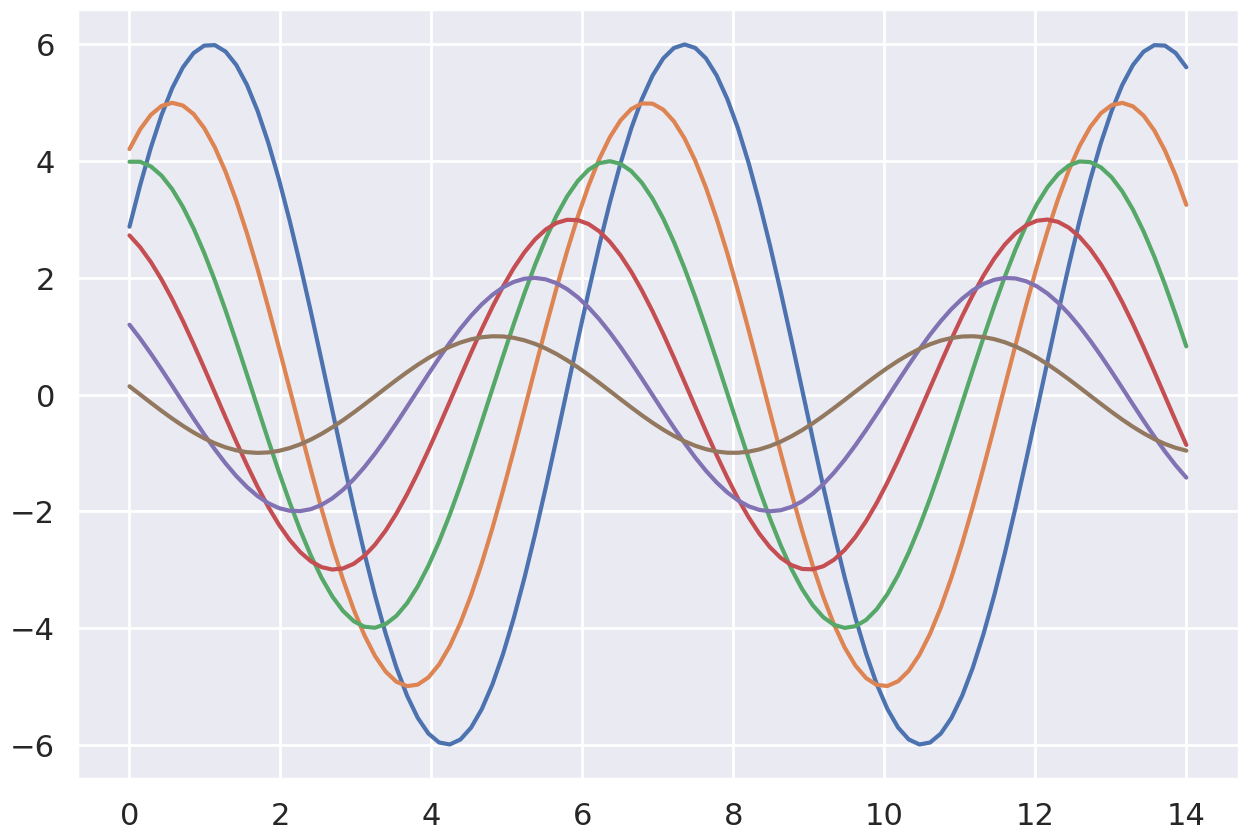

In [13]:
sns.set_context( "poster" )
sinplot()

Of course we can adjust each of these parameters (color palette, font sizes, line widths, etc.) arbitrarily. The interested reader is referred to Seaborn's tutorial (http://stanford.edu/~mwaskom/software/seaborn/tutorial.html).

## Visualizing data distributions

Seaborn also modifies histogram aesthetics:

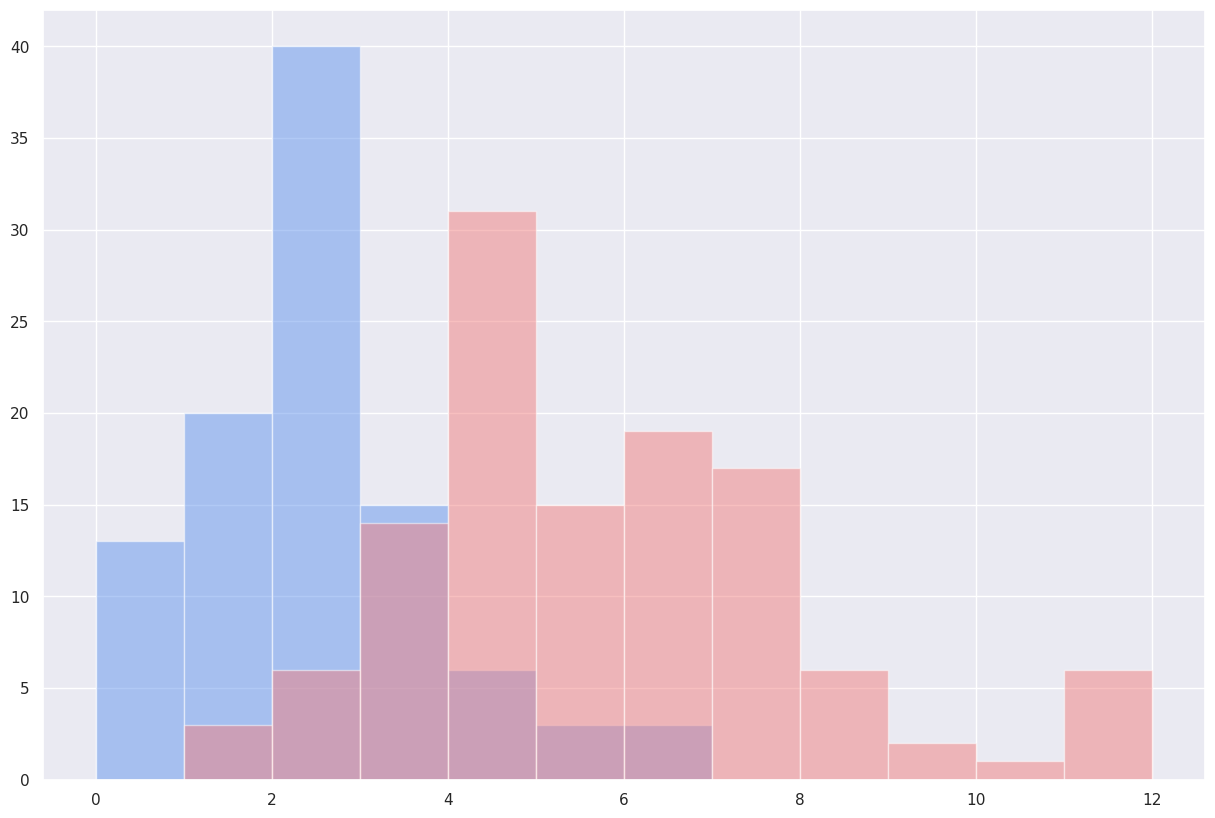

In [14]:
sns.set()
data1 = stats.poisson(2).rvs(100)
data2 = stats.poisson(5).rvs(120)
max_data = np.r_[data1, data2].max()
bins = np.linspace(0, max_data, max_data + 1)
plt.hist(data1, bins, color="#6495ED", alpha=.5)
plt.hist(data2, bins, color="#F08080", alpha=.5);

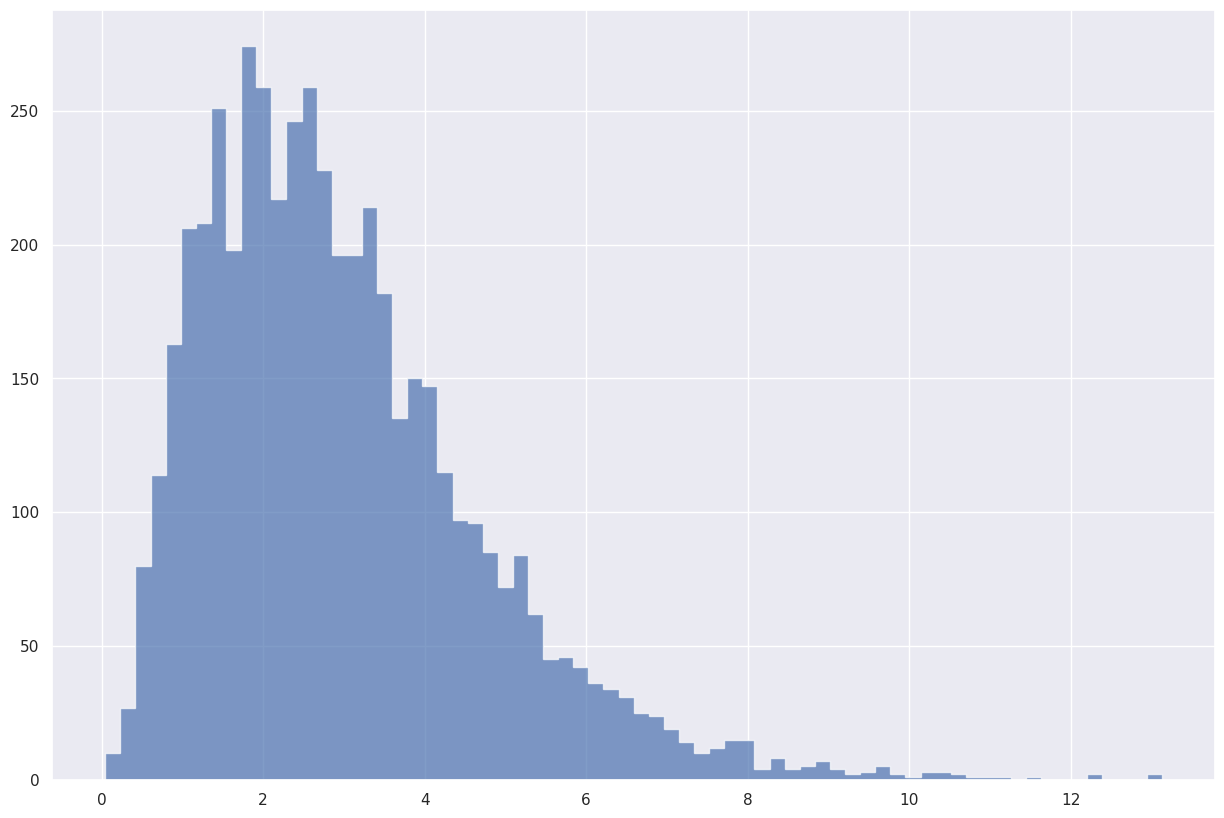

In [15]:
x = stats.gamma(3).rvs(5000)
plt.hist(x, 70, histtype="stepfilled", alpha=.7);

But, besides, it provides its own functions for data visualization. Matplotlib provides basic "hex" representations:

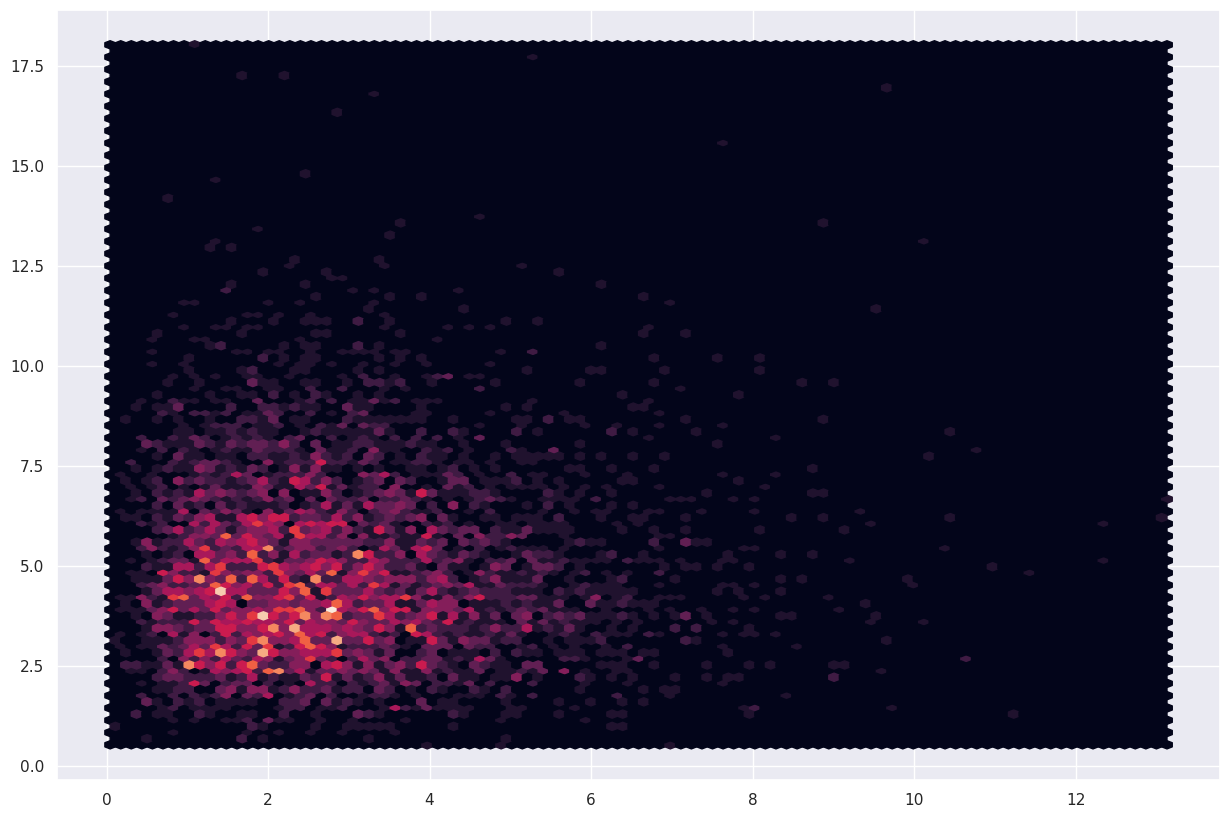

In [16]:
y = stats.gamma(5).rvs(5000)
plt.hexbin( x, y )

With Seaborn we can enable plotting marginal distributions on the axes:

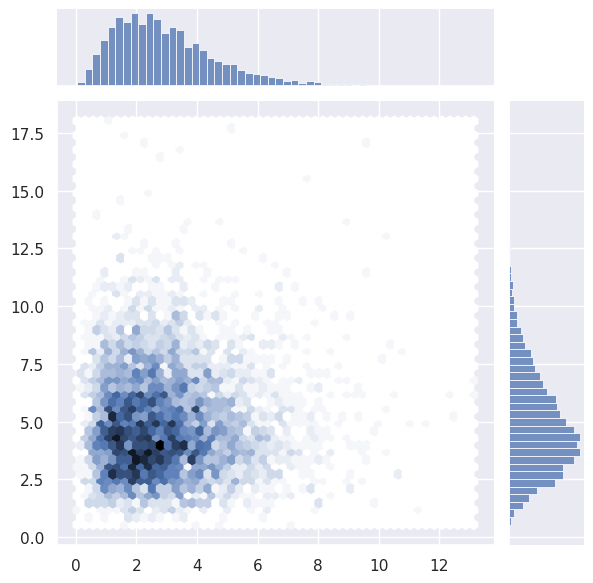

In [17]:
sns.jointplot( x=x, y=y, kind="hex" )

A rugplot() function draws vertical lines for each observation:

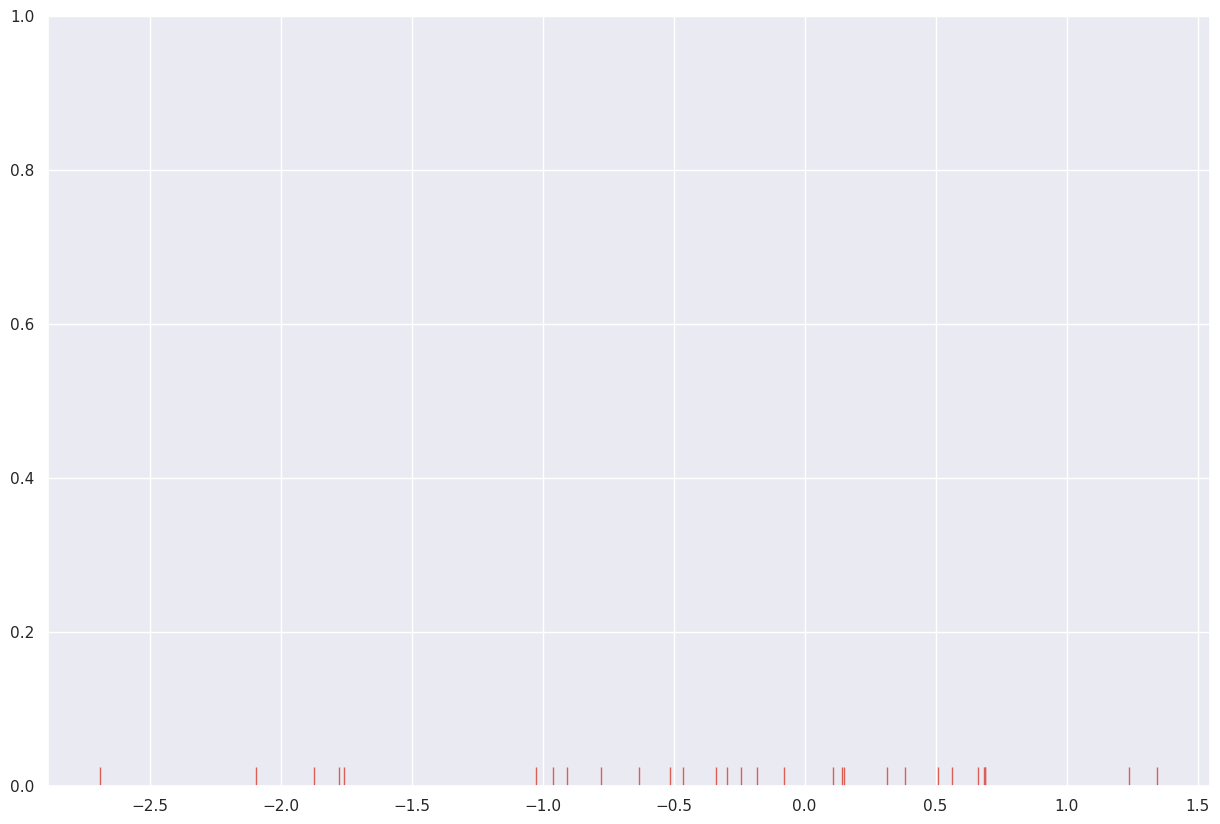

In [18]:
sns.set_palette("hls", 1)
data = np.random.randn(30)
sns.rugplot(data)
plt.ylim(0, 1);

The marker density indicates distribution density. We can plot together the rugplot and the classic histogram:

<Axes: >

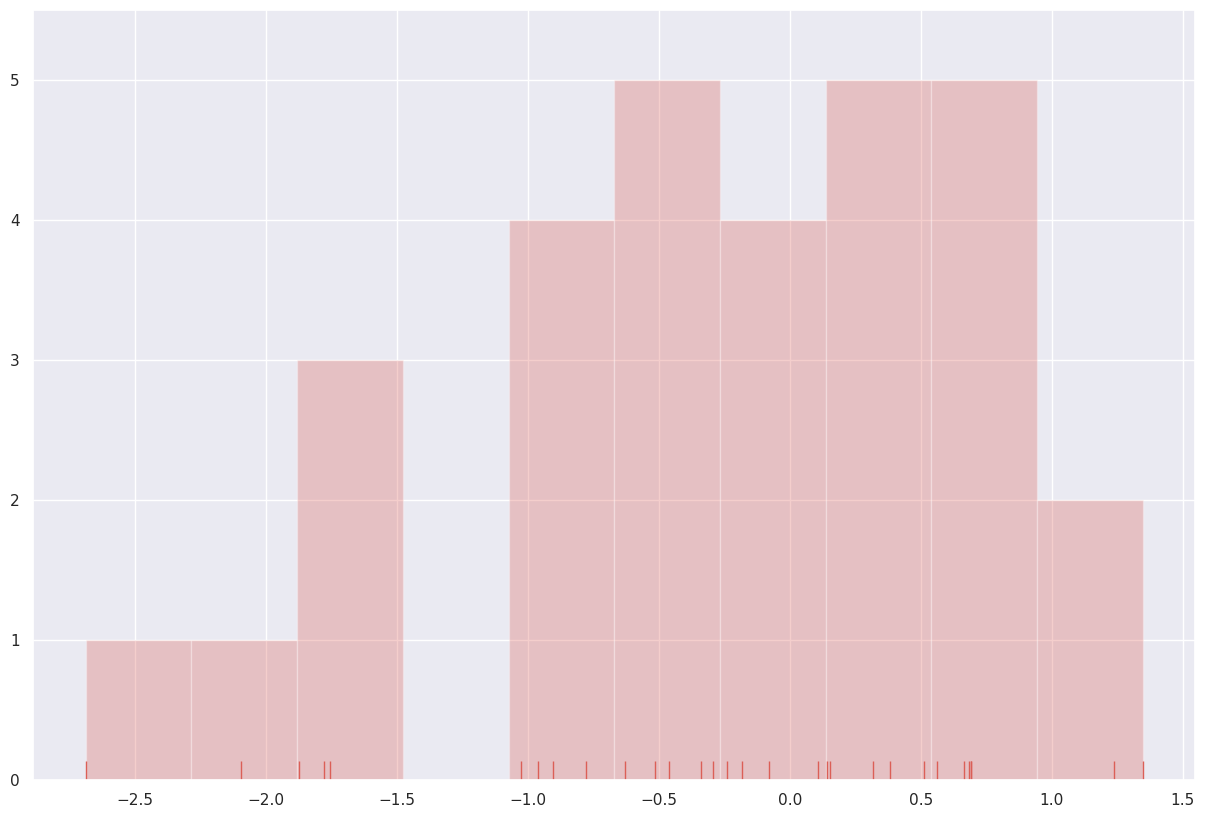

In [19]:
plt.hist( data, alpha=.3 )
sns.rugplot(data)

As does Pandas, Seaborn includes a KDE-style plot (Kernel Density Estimation):

<Axes: ylabel='Density'>

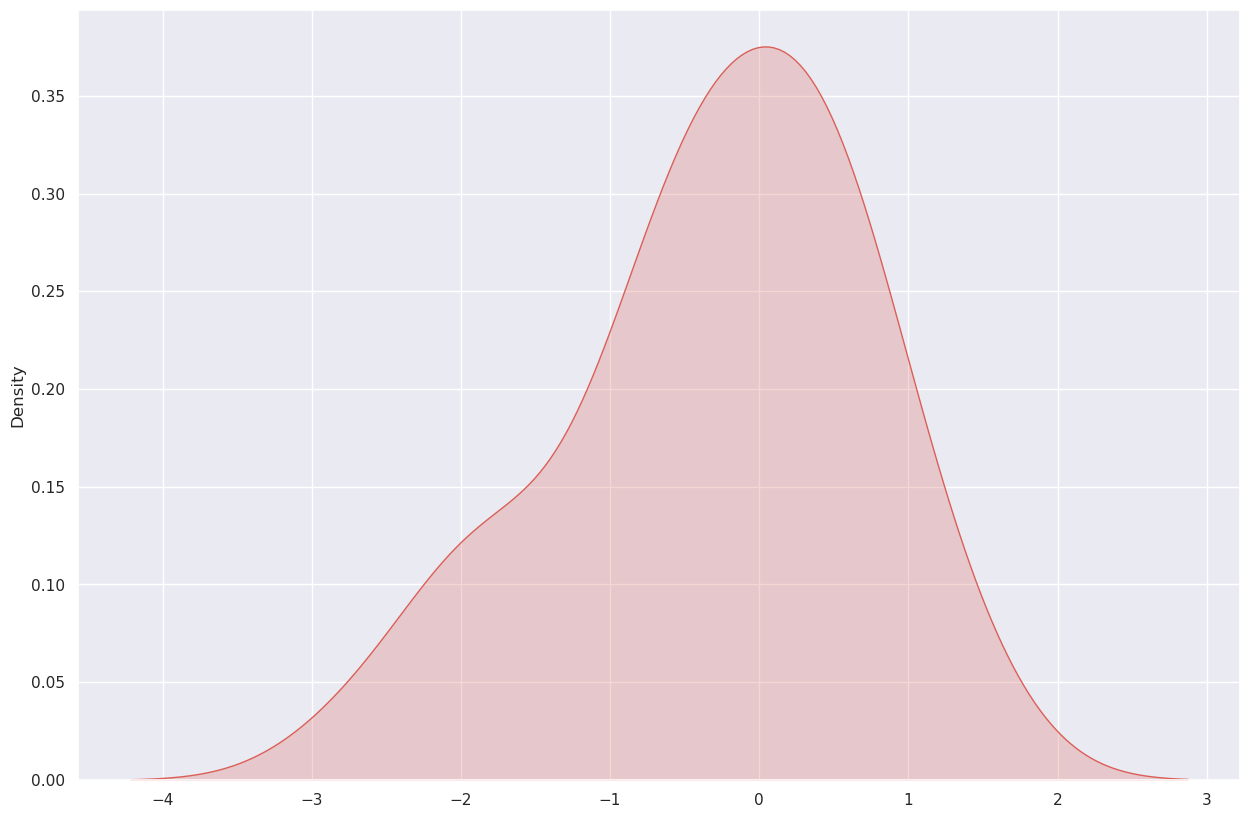

In [20]:
sns.kdeplot( data=data, fill=True )

We can use kdeplot() with multidimensional data:

<Axes: >

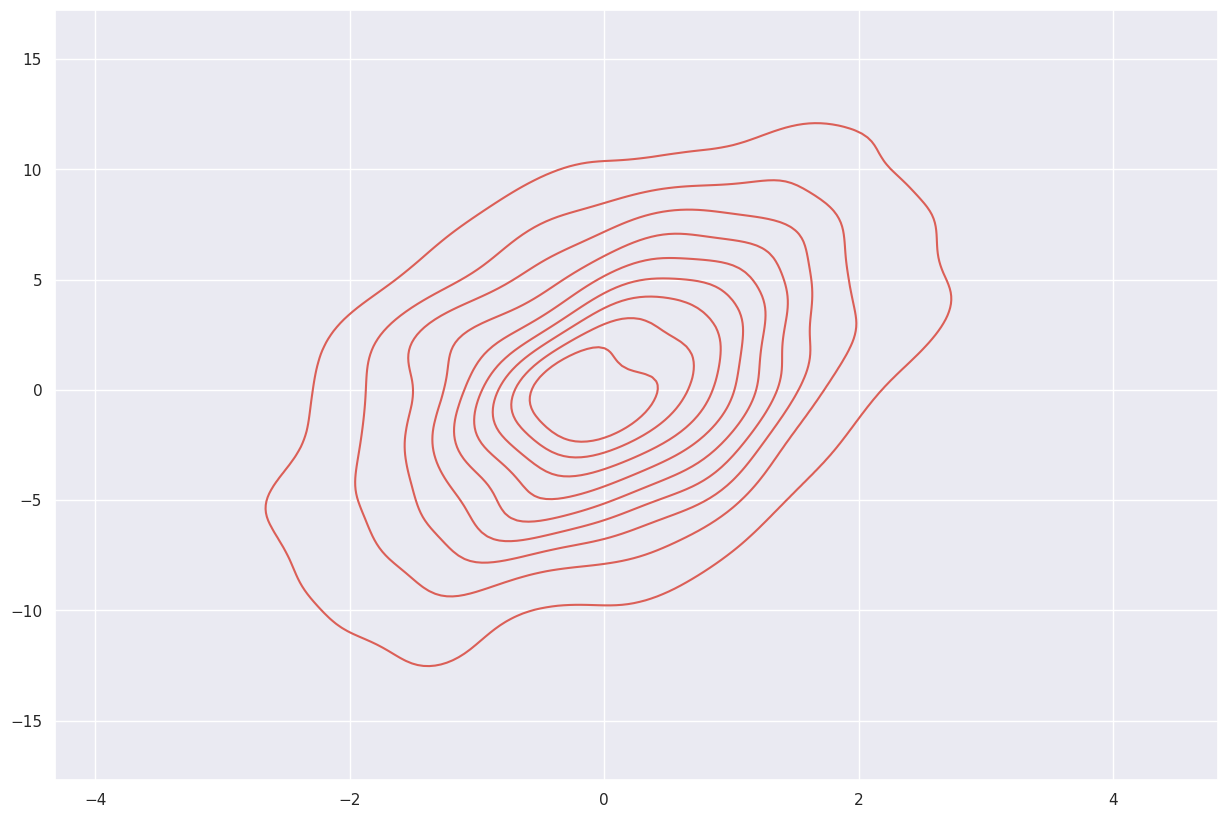

In [21]:
data = np.random.multivariate_normal([0, 0], [[1, 2], [2, 20]], size=1000)
sns.kdeplot(x=data[:,0], y=data[:,1] )

jointplot() does not only do "hex" plots:

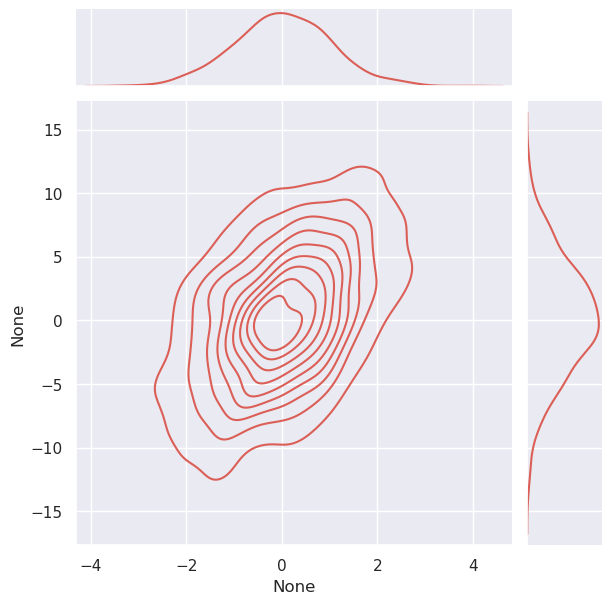

In [22]:
sns.jointplot(x=data[:,0], y=data[:,1], kind="kde");

distplot() tries to automate data visualization, combining different plots and automatically adjusting parameters (like the number of bins of a histogram):

/tmp/ipykernel_415969/3459063487.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data);


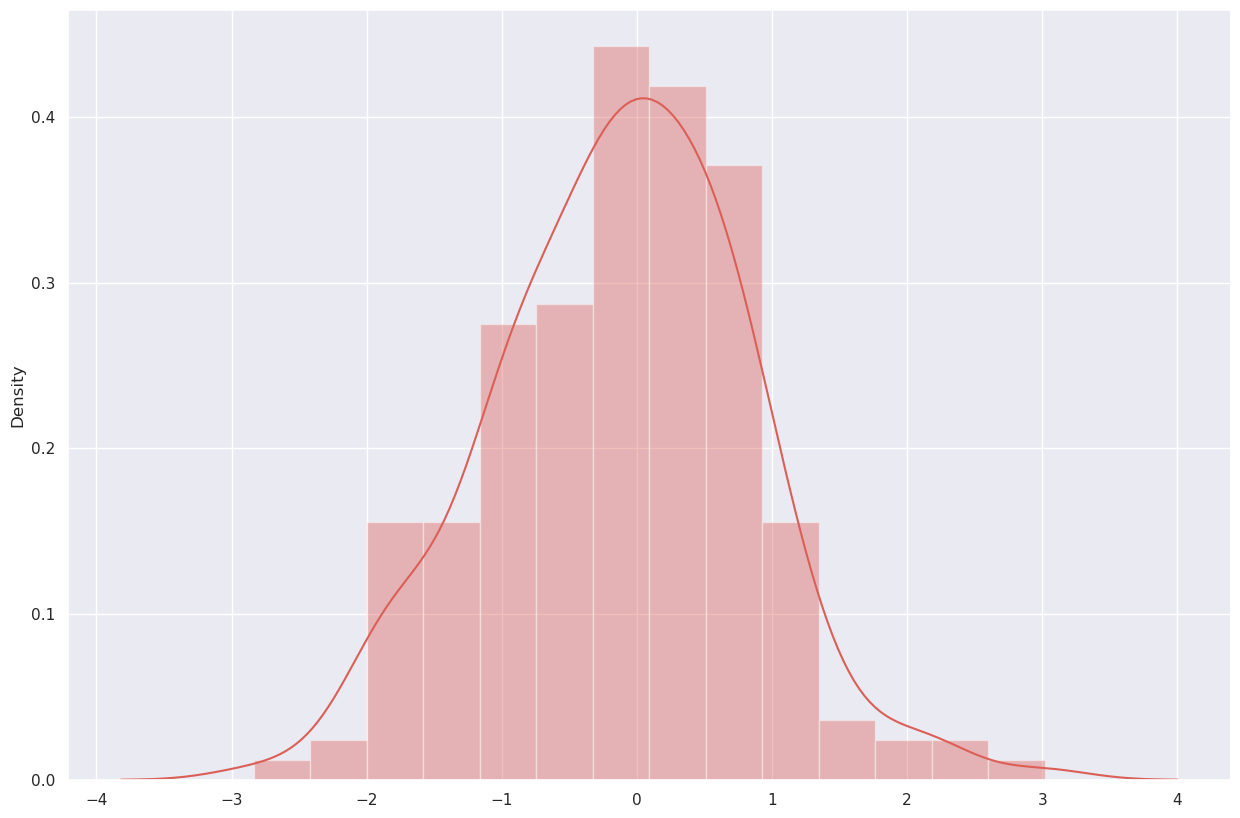

In [23]:
sns.set_palette("hls")
data = np.random.randn(200)
sns.distplot(data);

$hist, $kde$, and $rug$ are boolean parameters to distplot() for enabling/disabling these plots:

/tmp/ipykernel_415969/2531688055.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, rug=True, hist=False);


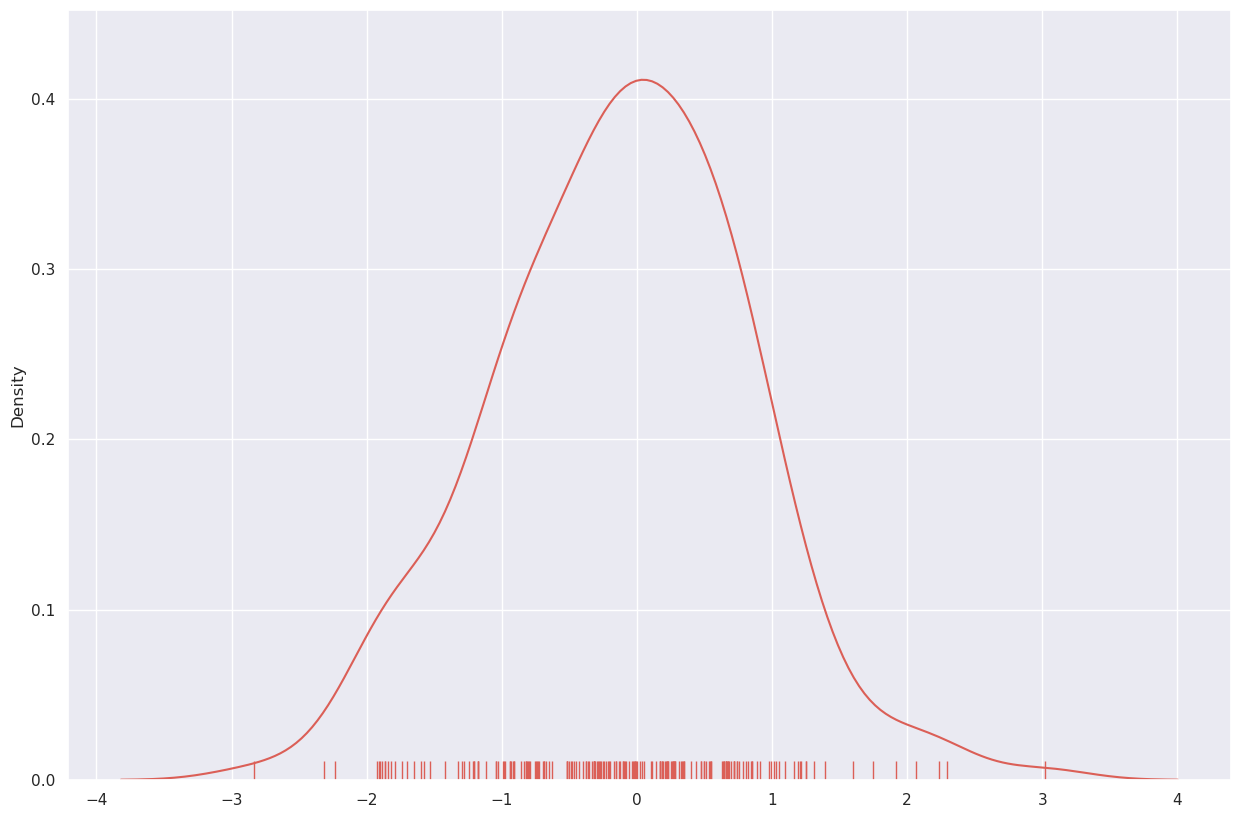

In [24]:
sns.distplot(data, rug=True, hist=False);

We can provide a family of functions (e.g., normal) and distplot will adjust the parameters using maximum likelyhood:

/tmp/ipykernel_415969/3233950367.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=False, fit=stats.norm);


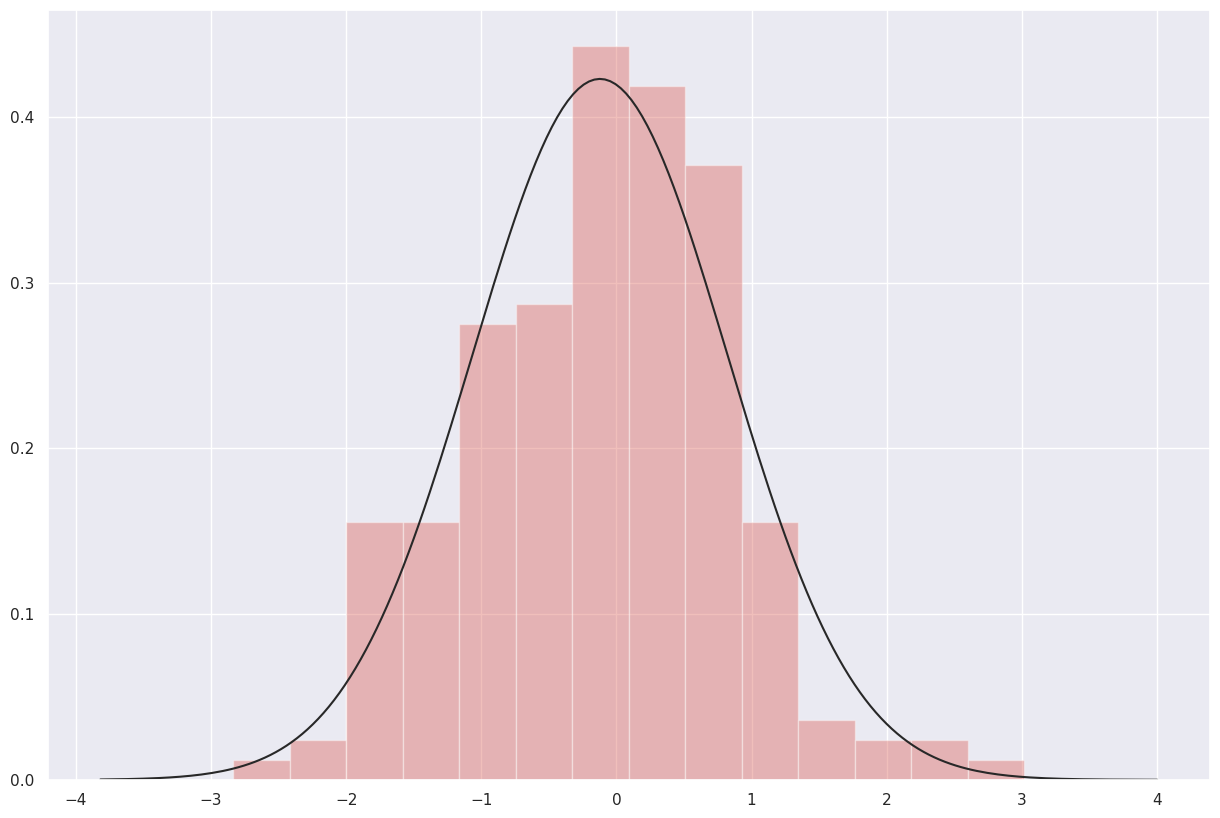

In [25]:
sns.distplot(data, kde=False, fit=stats.norm);

If data includes a $name$ attribute (e.g., working with Pandas objects), Seaborn will use it automatically for axis labels:

/tmp/ipykernel_415969/2982549708.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd.Series(data, name="score"), color="mediumpurple");


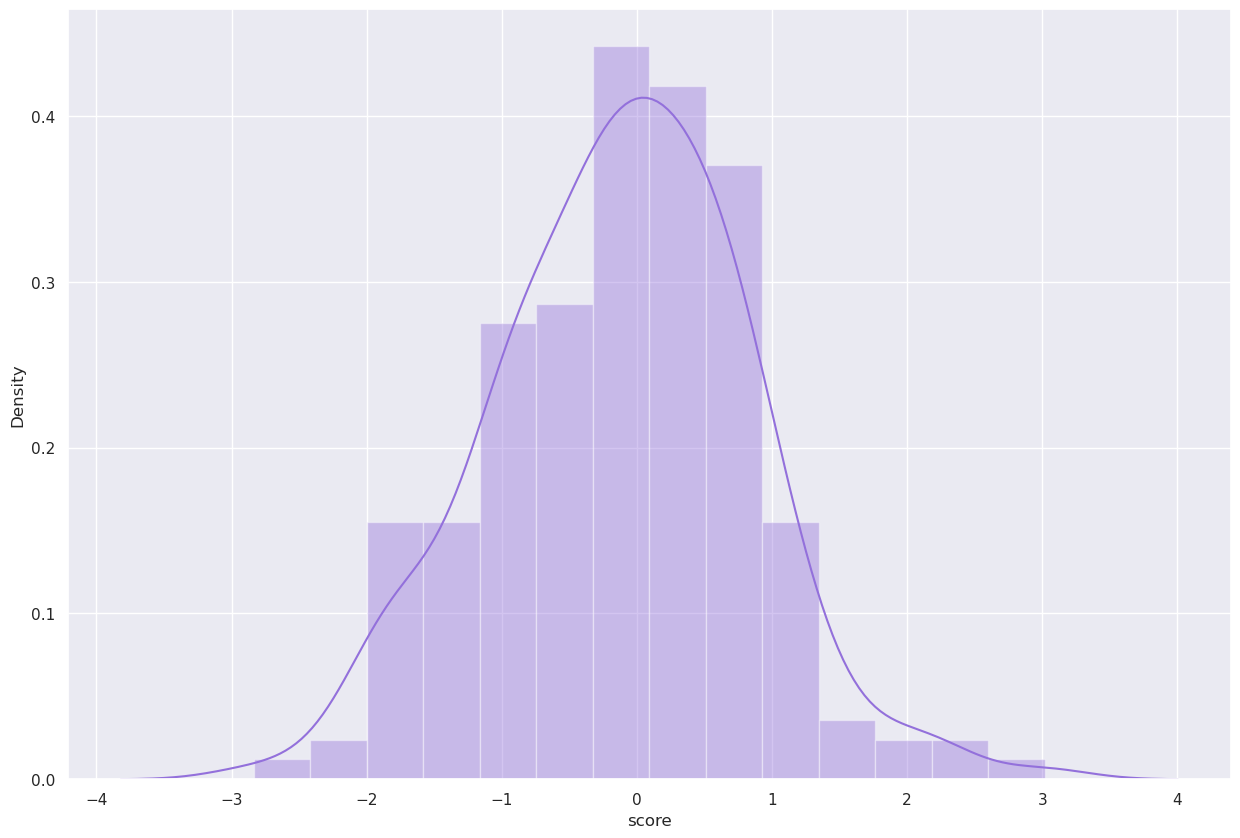

In [26]:
sns.distplot(pd.Series(data, name="score"), color="mediumpurple");

### Comparing distributions: boxplot() and violinplot()

Although Matplotlib already includes a boxplot() function:

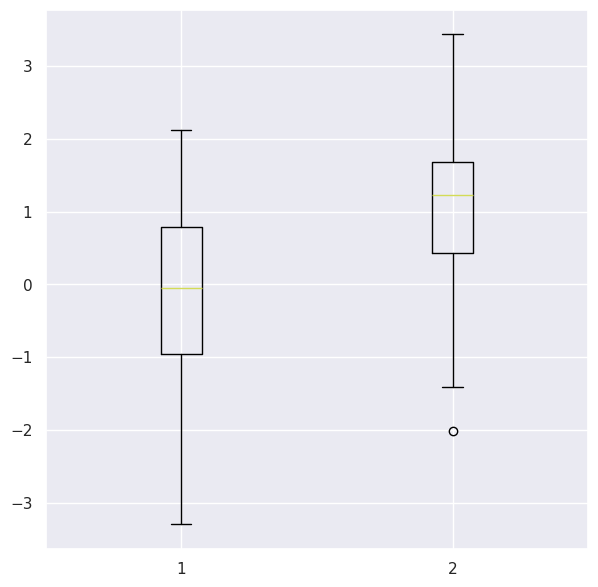

In [27]:
mpl.rc( "figure", figsize=(7,7) )
data = [np.random.randn(100), np.random.randn(100) + 1]
plt.boxplot(data);

Seaborn provides a better-looking alternative:

<Axes: >

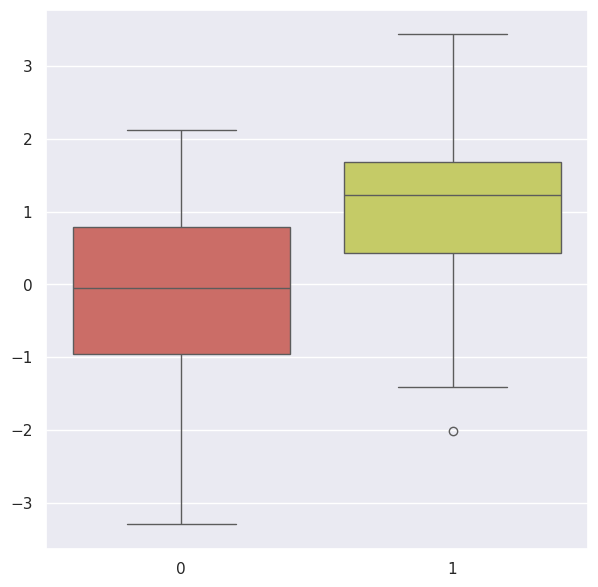

In [28]:
sns.boxplot( data = data )

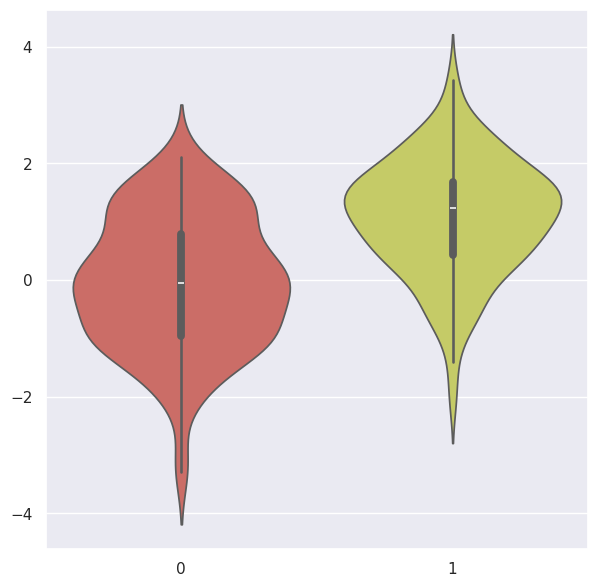

In [29]:
sns.violinplot( data = data );

## Linear regression models

### Visualizing multiple regressions

lmplot() explores the possible linear relationships among multidimensional dataset. Input data must be a Pandas DataFrame:

In [30]:
mpl.rc( "figure", figsize=(15,10) )
tips = pd.read_csv( "Files-09/tips.csv" )
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

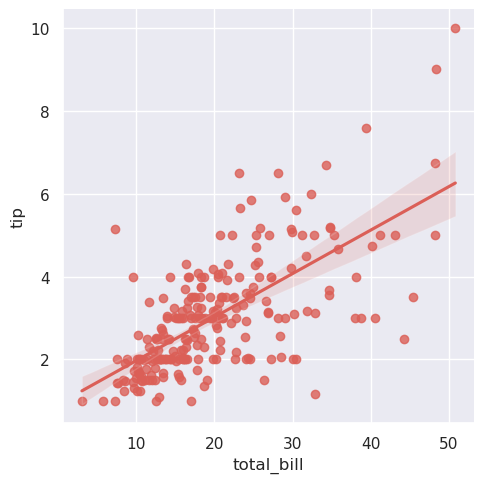

In [31]:
sns.lmplot( x="total_bill", y="tip", data=tips );

This plot includes two parts: the first is a scatterplot. The second is the adjusted linear regression model. The model is shown together with a 5% confidence band. We can change the confidence value using the $ci$ parameter:

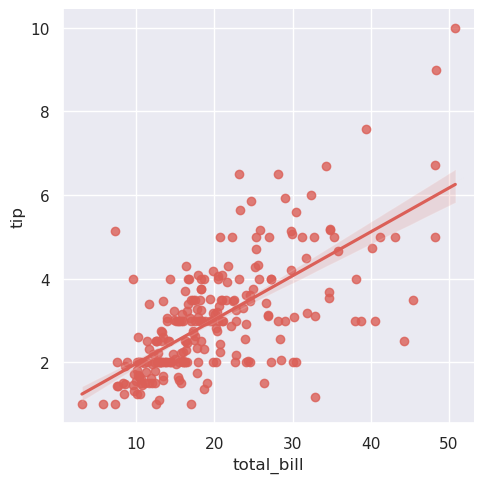

In [32]:
sns.lmplot( x="total_bill", y="tip", data=tips, ci=68);

### Regressions with discrete variables

Sometimes, the variables involved in a linear regression are cuantitative, but discrete:

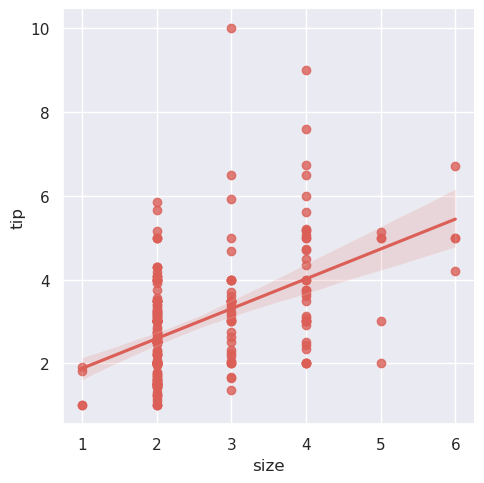

In [33]:
sns.lmplot(x="size", y="tip", data=tips);

We can add random jitter to the data points to help assess density:

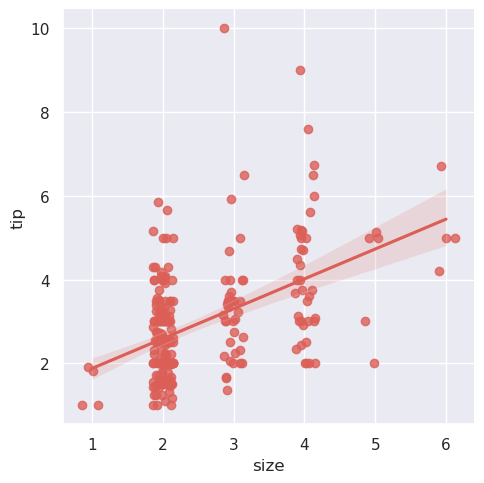

In [34]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.15);

We can also estimate the central tendencies for each category. For this,we use the $x\_estimator$ parameter, providing an aggregation function for each category over the Y axis:

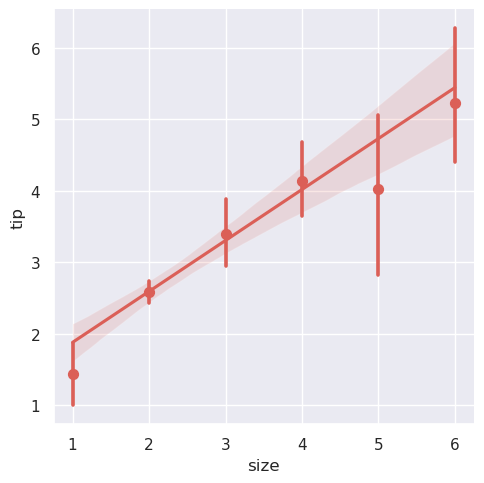

In [35]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

The 95% confidence band for the category means is shown.

It could be useful to group a continuous variable in discrete categories and estimate a central tendency and confidence interval. lmplot() allows to specify category bins:

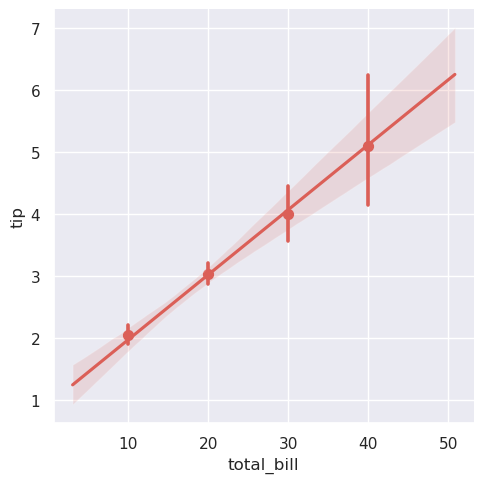

In [36]:
bins = [10, 20, 30, 40]
sns.lmplot(x="total_bill", y="tip", data=tips, x_bins=bins);

Or we can simply provide the number of bins and leat Seaborn build them automatically:

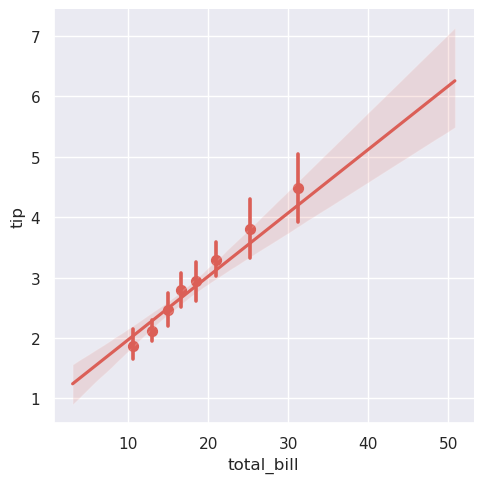

In [37]:
sns.lmplot(x="total_bill", y="tip", data=tips, x_bins=8);

### Relations in grouped variables

We can introduce grouping factors on the regression variables to observe the changes that external factors might made to the regression. For example, we can perform the same regression as before, but grouping data in smokers vs. non smokers:

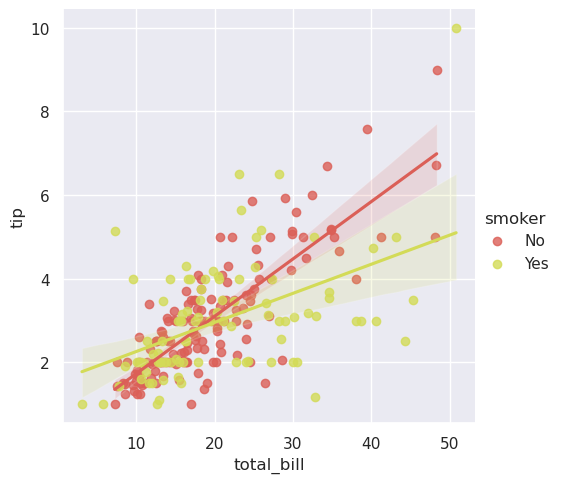

In [38]:
sns.lmplot(x="total_bill", y="tip", data=tips, hue="smoker");

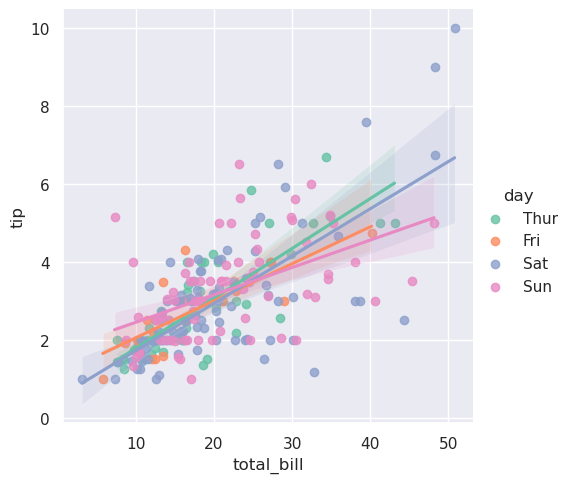

In [39]:
sns.lmplot(x="total_bill", y="tip", data=tips, hue="day", palette="Set2", hue_order=["Thur", "Fri", "Sat", "Sun"]);

### Plotting different linear relations

By default, lmplot() shows a least-squares regression. But we do not need to adjust any regression at all:

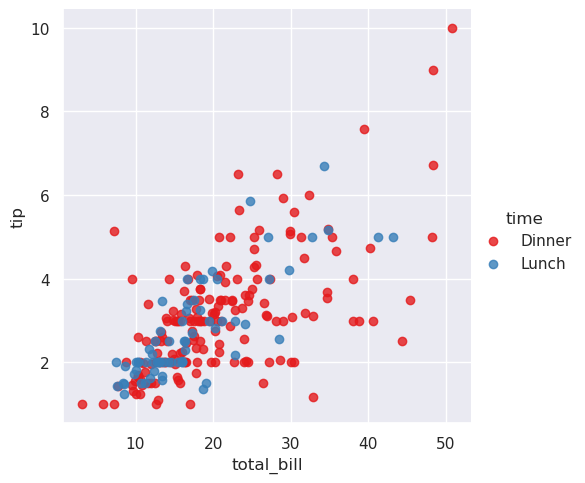

In [40]:
sns.lmplot(x="total_bill", y="tip", data=tips, hue="time", palette="Set1", fit_reg=False);

Or we can adjust a non-linear regression:

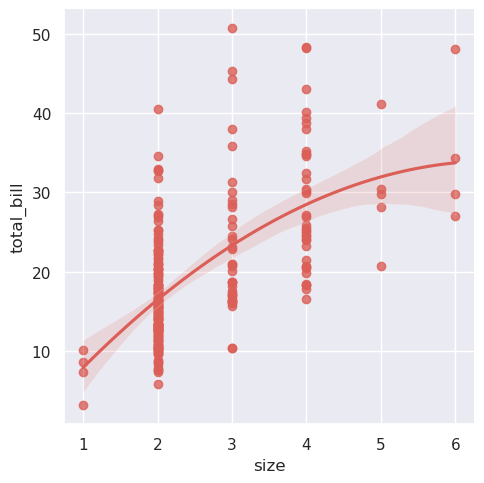

In [41]:
sns.lmplot(x="size", y="total_bill", data=tips, order=2);

Or a LOWESS line (LOcaly WEighted Scatterplot Smoothing):

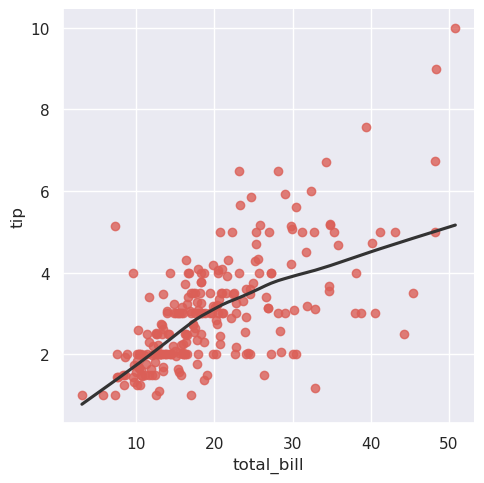

In [42]:
sns.lmplot(x="total_bill", y="tip", data=tips, lowess=True, line_kws={"color": ".2"});

### Logistic regression

Let us define an independent boolean metric, which is True when a tip is above 15%:

In [43]:
tips["big_tip"] = (tips["tip"] / tips["total_bill"]) > .15
tips.head()

total_bill   tip     sex smoker  day    time  size  big_tip
0       16.99  1.01  Female     No  Sun  Dinner     2    False
1       10.34  1.66    Male     No  Sun  Dinner     3     True
2       21.01  3.50    Male     No  Sun  Dinner     3     True
3       23.68  3.31    Male     No  Sun  Dinner     2    False
4       24.59  3.61  Female     No  Sun  Dinner     4    False

We can adjust a linear model as before:

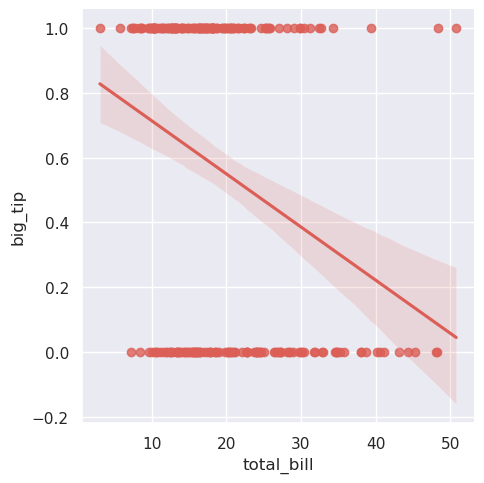

In [44]:
sns.lmplot(x="total_bill", y="big_tip", data=tips);

Which seems to suggest that clients with larger bills are less prone to tip generously. However, this model has several probles. One of them is that individual observations in the X axis are plotted on top of each other, and so their density is unclear. We can fix this problem adding some jitter on the Y axis:

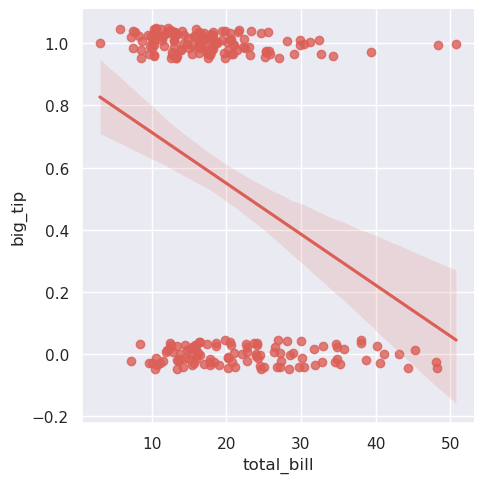

In [45]:
sns.lmplot(x="total_bill", y="big_tip", data=tips, y_jitter=.05);

A second, more important problem, is to use a linear regression on a binary variable. lmplot() can adjust a logistic regression:

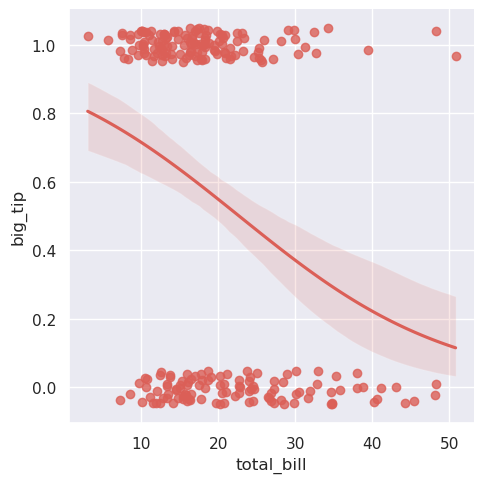

In [46]:
sns.lmplot(x="total_bill", y="big_tip", data=tips, y_jitter=.05, logistic=True);

### Examining model residuals

We can visualize residuals using residplot():

<Axes: xlabel='total_bill', ylabel='tip'>

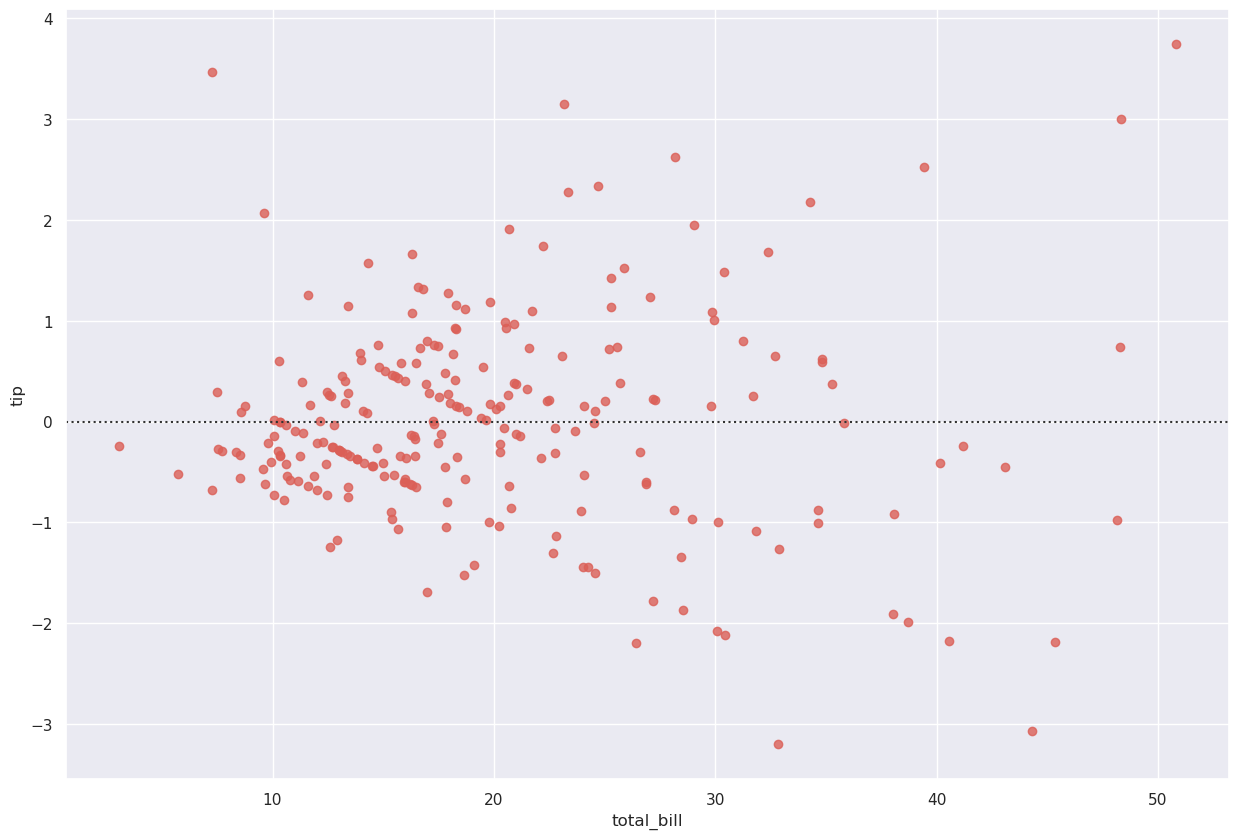

In [47]:
sns.residplot( x=tips.total_bill, y=tips.tip )

For instance, if we adjusted a linear model to a higher order relation:

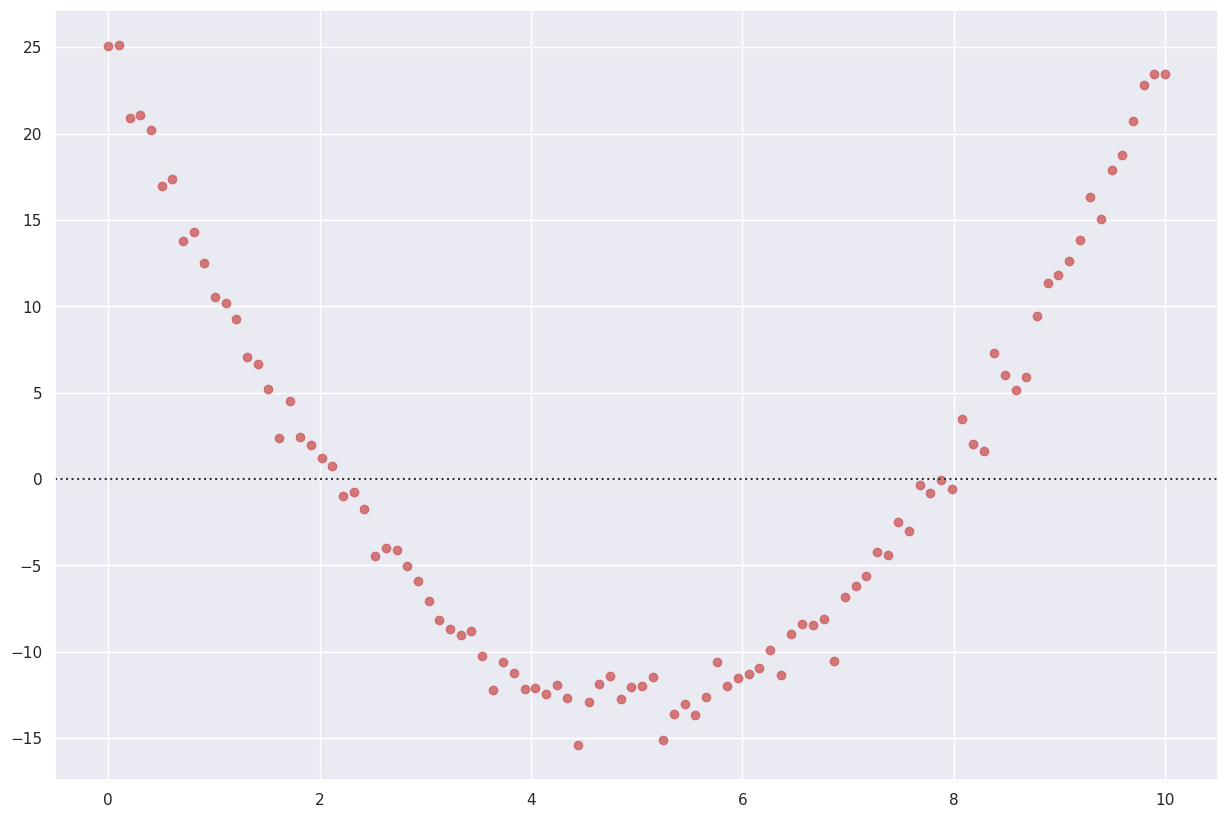

In [48]:
x = np.linspace( 0, 10, 100 )
y = x + 1.5 * x ** 2 + np.random.randn(len(x))
sns.residplot(x=x, y=y, color="indianred");

Although the problem here is self-evident, we can visualize it better adjusting a LOWESS line:

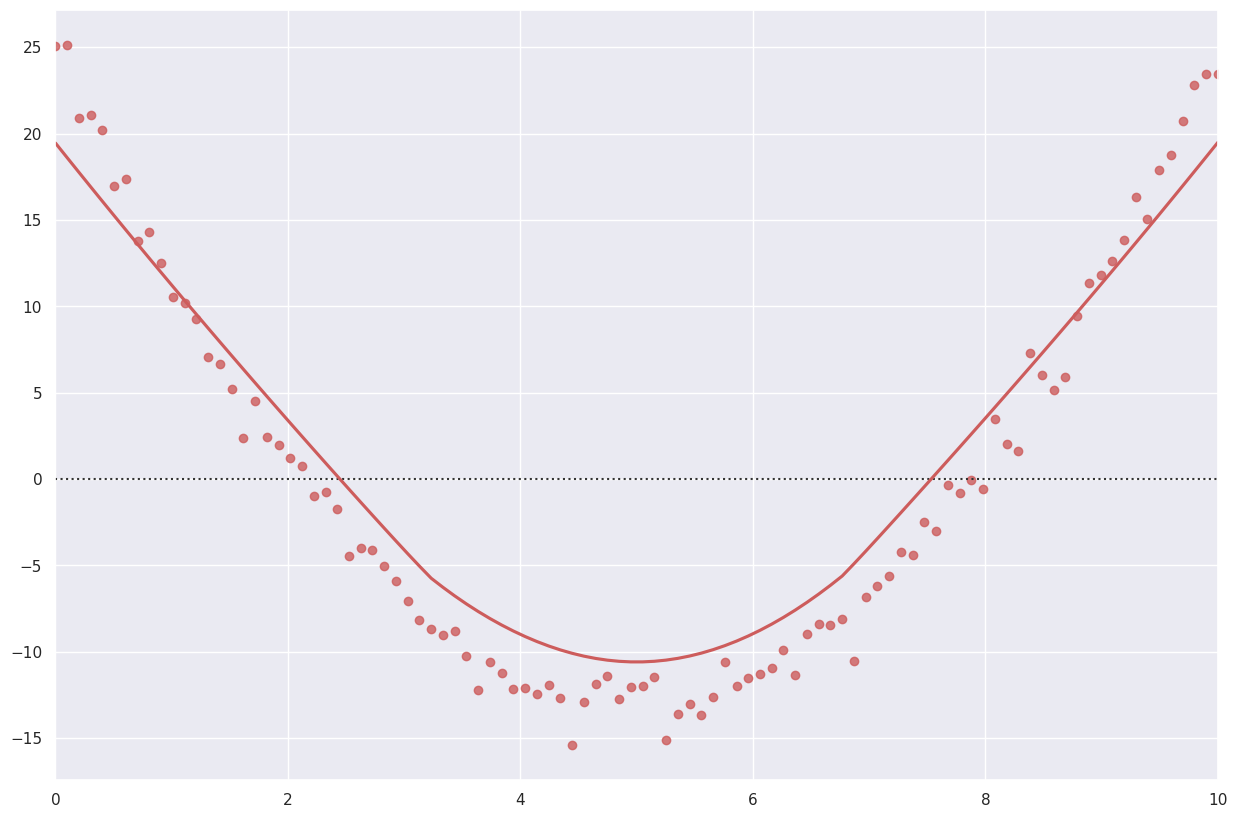

In [49]:
sns.residplot(x=x, y=y, color="indianred", lowess=True);

residplot() can calculate residuals as a polynomic regression. Let's see what happens when we adjust a 2nd order regression to this data:

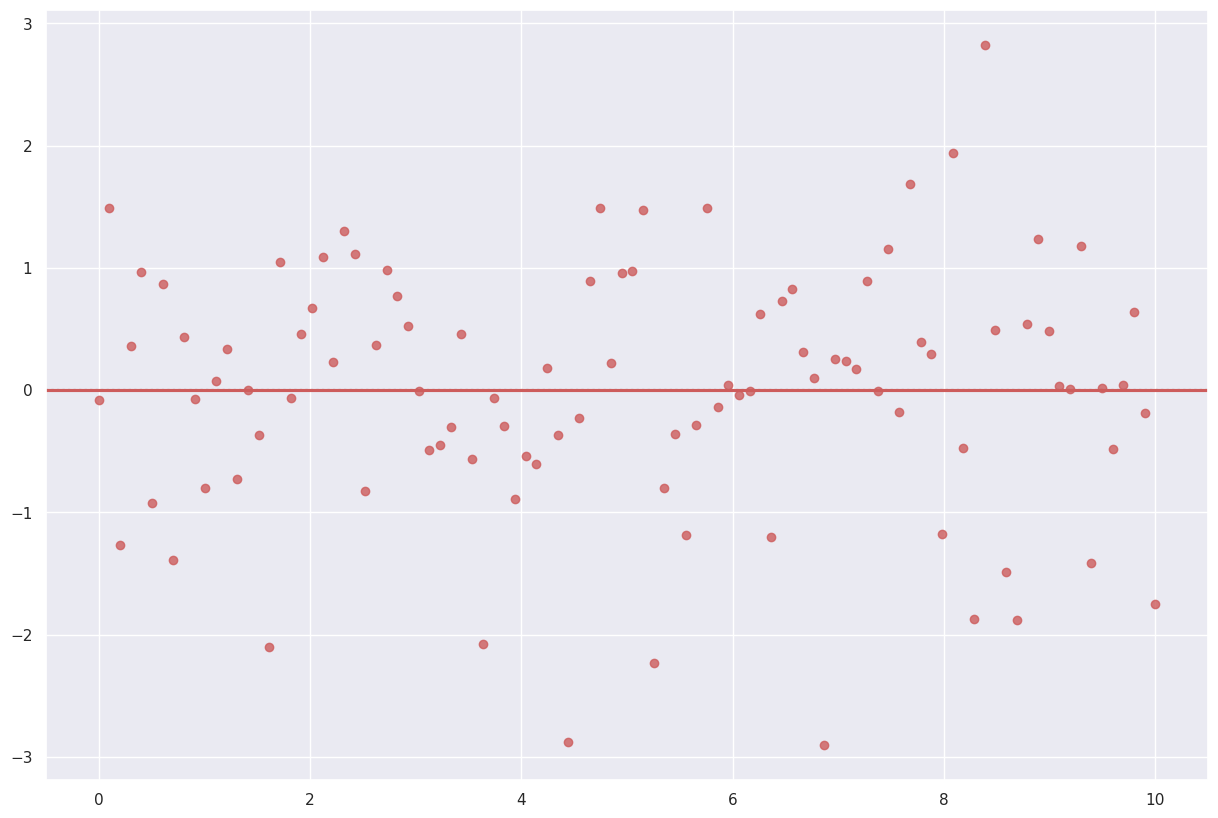

In [50]:
sns.residplot(x=x, y=y, color="indianred", order=2, lowess=True);

Seaborn also provides tools for adjusting regression models on cualitative variables, which we won't explore in this brief primer.

## Visual exploration of datasets

Often a good first step towards visualizing a dataset is to use a heatmap. The sns.heatmap() function accepts a Pandas DataFrame and plots a single variable on the rows and a single variable on the columns:

In [51]:
flights = sns.load_dataset("flights")

load_dataset() loads (if we have an active internet connection) example datasets included with Seaborn. We have just loaded a list of flights from 1949 to 1960, including information about the date and passengers of a particular route:

In [52]:
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

We need to pivot this table to make it rectangular:

In [53]:
flights_rect = flights.pivot(index="month", columns="year", values="passengers")
flights_rect

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   170   199   230   264   302   364   413   465   491   548   622
Aug     148   170   199   242   272   293   347   405   467   505   559   606
Sep     136   158   184   209   237   259   312   355   404   404   463   508
Oct     119   133   162   191   211   229   274   306   347   359   407   461
Nov     104   114   146   172   180   203   237   271   305   310   362   390
Dec     118   140   166   194   201   229   278   306   336   337   405   432

And now we plot the heatmap:

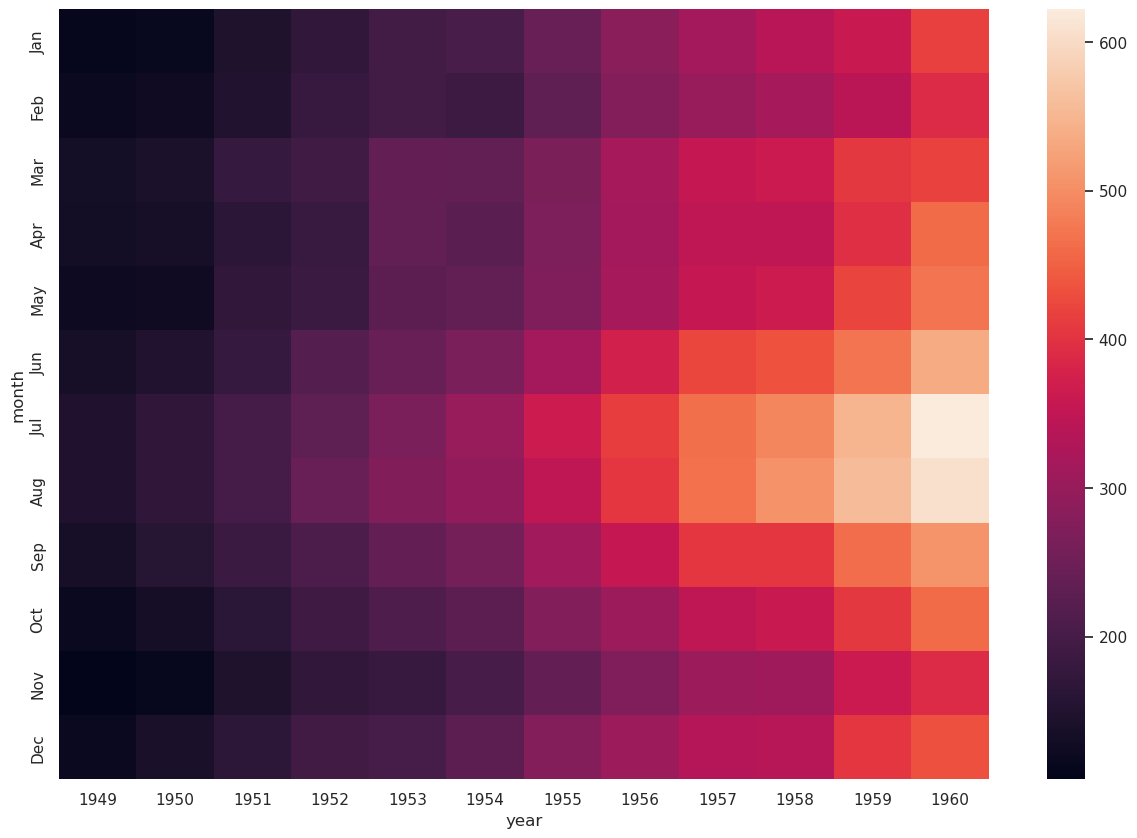

In [54]:
sns.heatmap( flights_rect );

If we want to plot the numerical data on top of each cell, we can do just that:

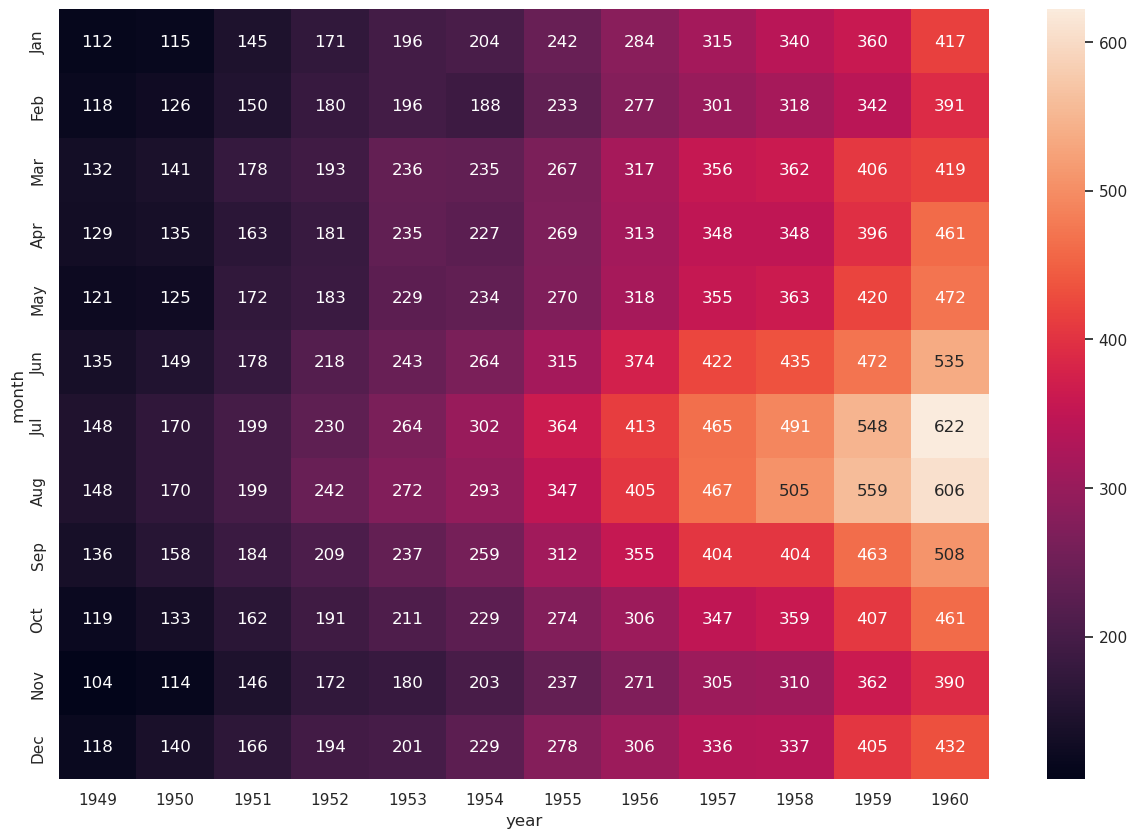

In [55]:
sns.heatmap(flights_rect, annot=True, fmt="d");

### Visualizing data clusters

It can be usefult to see the relations between our rows and columns in the heatmap. clustermap() reorganizes the heatmap so that similar rows and columns are physically close:

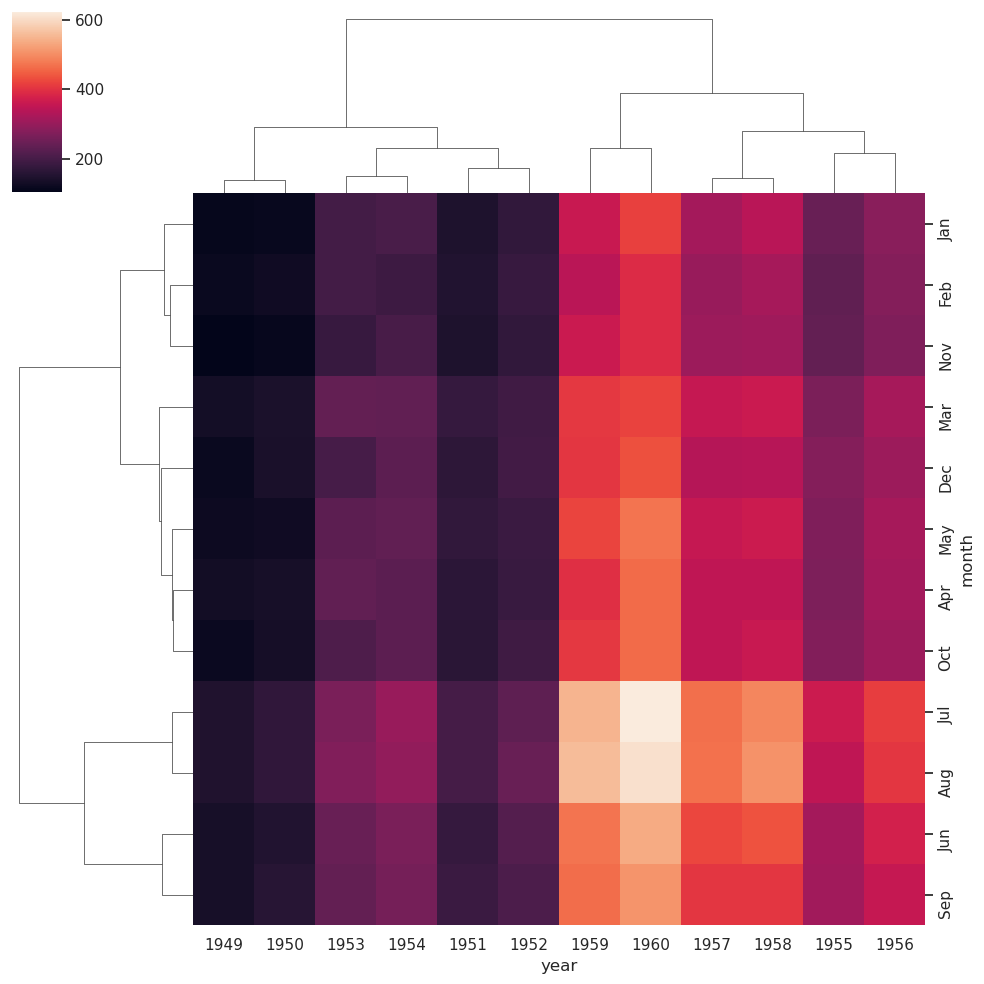

In [56]:
cg = sns.clustermap(flights_rect)

This plot is biased in the sense that the number of passengers grew on a yearly basis. We can scale data so that we can draw comparisons between different years:

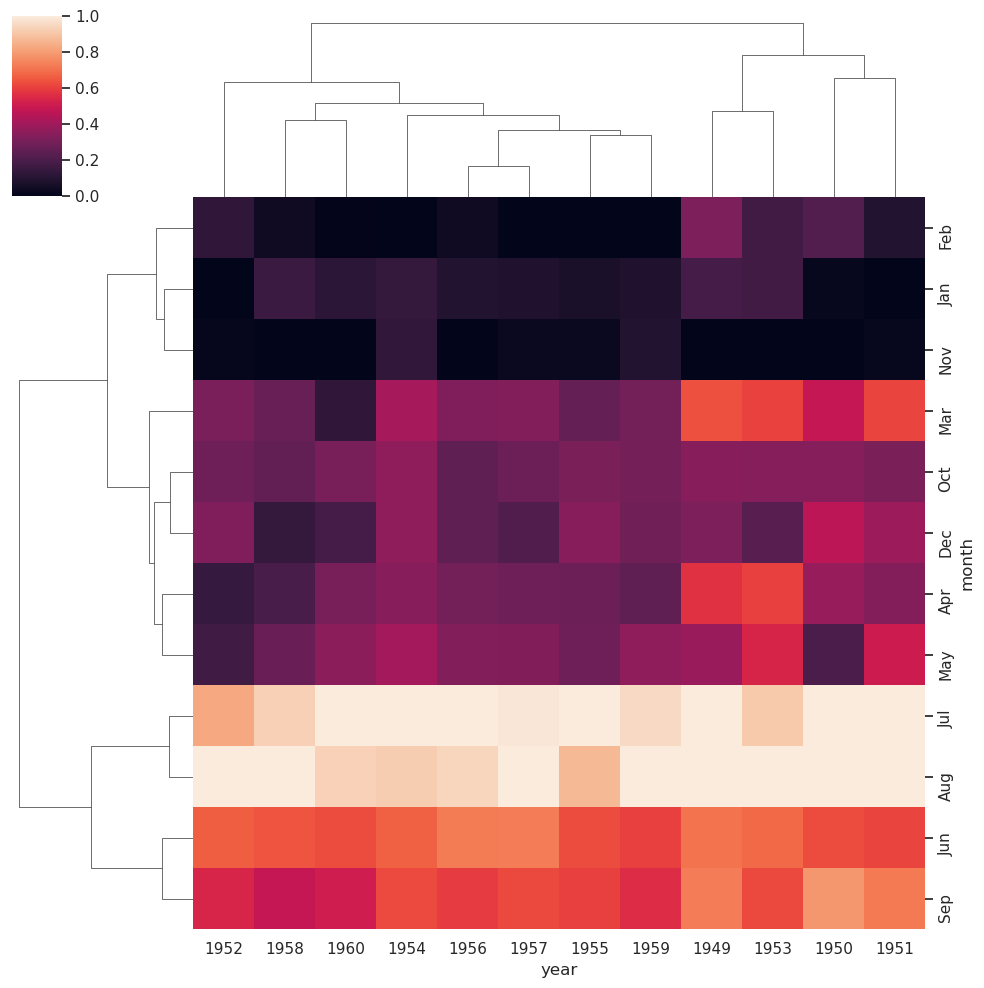

In [57]:
cg = sns.clustermap(flights_rect, standard_scale=1)

We could also have scaled the rows, to assess how each year behaves when we normalize over months:

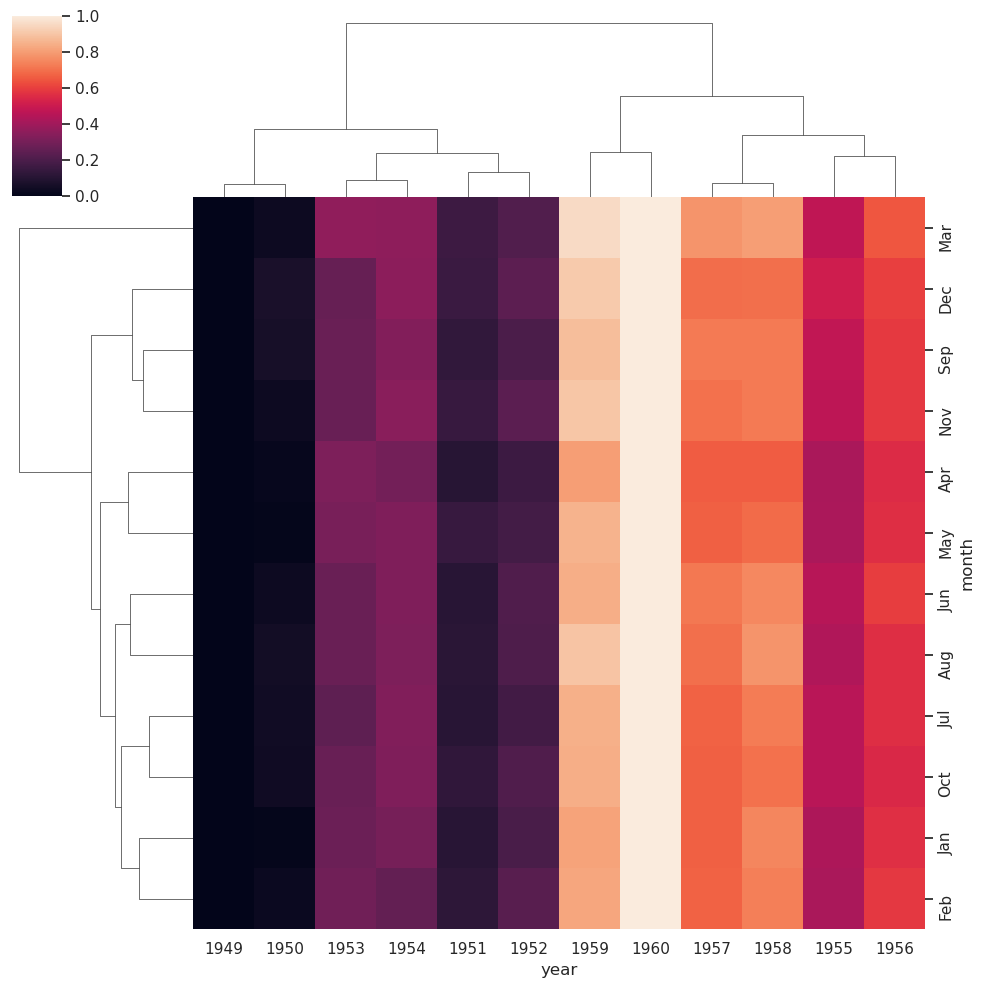

In [58]:
cg = sns.clustermap(flights_rect, standard_scale=0)

Seaborn provides many more functionalities and plot types, but it is not our target to examine these in depth. This brief tutorial seeks to exemplify the types of operations and plots that we can build with this library.